# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # time shift
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path= './data/NCDC/europe/spain/almeria/dat.txt' # negative dimensions?
# file_path= './data/NCDC/europe/greece/eleftherios_intl/dat.txt'
# file_path= './data/NCDC/europe/greece/elefsis/dat.txt' # bad dataset
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" , 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Good data, Weird KDE shape, might be blocked?
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, incomplete dataset

# file_path = './data/asos/denver/hr_avg.csv'
# file_path = './data/asos/bismarck_ND/hr_avg.csv' # try 4
# file_path = './data/asos/aberdeen_SD/hr_avg.csv' # only to 2012, good fit, try 2
# file_path = './data/asos/minneapolis/hr_avg.csv'
# file_path = './data/asos/lincoln_NE/hr_avg.csv' 
# file_path = './data/asos/des_moines_IA/hr_avg.csv'
# file_path = './data/asos/springfield_IL/hr_avg.csv' # good fit
# file_path = './data/asos/topeka/hr_avg.csv' # High 0

# file_path = './data/NDAWN/baker/hr_avg.csv' # 4 might be better
# file_path = './data/NDAWN/dickinson/hr_avg.csv'
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19930101  0000  FM-12   40    1.5         N
1       19930101  0050  FM-15   30    1.0         N
2       19930101  0150  FM-15   30    1.0         N
3       19930101  0250  FM-15   50    0.5         N
4       19930101  0300  FM-12   50    0.5         N
5       19930101  0350  FM-15  999    0.0         C
6       19930101  0450  FM-15   80    0.5         N
7       19930101  0550  FM-15  999    0.0         C
8       19930101  0650  FM-15  999    0.0         C
9       19930101  0720  FM-16  999    0.0         C
10      19930101  0750  FM-15   90    0.5         N
11      19930101  0850  FM-15   70    1.0         N
12      19930101  0950  FM-15   80    0.5         N
13      19930101  1050  FM-15   70    1.5         N
14      19930101  1150  FM-15   80    3.0         N
15      19930101  1250  FM-15   90    4.6         N
16      19930101  1350  FM-15   80    3.6         N
17      19930101  1450  FM-15   70    3.0         N
18      19930101  1550  FM-15   70    2.5         N
19      19930101  1650  FM-15   40    2.0         N
20      19930101  1750  FM-15   40    1.0         N
21      19930101  1850  FM-15  360    1.0         N
22      19930101  1950  FM-15   20    0.5         N
23      19930101  2050  FM-15   10    1.0         N
24      19930101  2100  FM-12   10    1.0         N
25      19930101  2150  FM-15   30    0.5         N
26      19930101  2250  FM-15  999    0.0         C
27      19930101  2350  FM-15   30    1.0         N
28      19930102  0000  FM-12   30    1.0         N
29      19930102  0050  FM-15   20    0.5         N
...          ...   ...    ...  ...    ...       ...
337660  20160201  0020  FM-15  250    8.2         N
337661  20160201  0120  FM-15  260    8.8         N
337662  20160201  0220  FM-15  260    8.2         N
337663  20160201  0320  FM-15  250    5.7         N
337664  20160201  0420  FM-15  260    8.2         N
337665  20160201  0432  FM-16  250    9.3         N
337666  20160201  0520  FM-15  260    9.8         N
337667  20160201  0620  FM-15  260    9.3         N
337668  20160201  0637  FM-16  250    8.2         N
337669  20160201  0720  FM-15  260    8.8         N
337670  20160201  0820  FM-15  260    9.8         N
337671  20160201  0915  FM-16  250    9.3         N
337672  20160201  0920  FM-15  250    9.8         N
337673  20160201  1020  FM-15  250    7.7         N
337674  20160201  1027  FM-16  250    7.2         N
337675  20160201  1049  FM-16  250    9.3         N
337676  20160201  1120  FM-15  250    8.8         N
337677  20160201  1220  FM-15  250    7.2         N
337678  20160201  1320  FM-15  250    5.7         N
337679  20160201  1420  FM-15  240    5.1         N
337680  20160201  1520  FM-15  240    7.2         N
337681  20160201  1620  FM-15  230    7.7         N
337682  20160201  1720  FM-15  250    6.7         N
337683  20160201  1820  FM-15  250    4.1         N
337684  20160201  1920  FM-15  260    5.1         N
337685  20160201  2000  FM-16  260    8.2         N
337686  20160201  2020  FM-15  250    6.7         N
337687  20160201  2120  FM-15  250    4.6         N
337688  20160201  2220  FM-15  240    5.1         N
337689  20160201  2320  FM-15  200    3.1         N

[337690 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

48.711 11.212


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


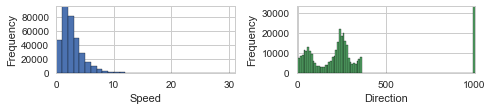

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  3.376000e+05  337600.000000  337600.000000  337600.000000   
mean   2.004908e+07    1153.222393     241.364428       2.425278   
std    5.958046e+04     684.766752     265.128758       1.917202   
min    1.993010e+07       0.000000       0.000000       0.000000   
25%    2.000113e+07     600.000000      80.000000       1.000000   
50%    2.005091e+07    1120.000000     190.000000       2.000000   
75%    2.010040e+07    1720.000000     240.000000       3.100000   
max    2.016020e+07    2359.000000     999.000000      30.900000   

               month   dir_windrose  
count  337600.000000  337600.000000  
mean        6.476961     261.733546  
std         3.509480     262.621158  
min         1.000000       0.000000  
25%         3.000000      80.000000  
50%         6.000000     230.000000  
75%        10.000000     280.000000  
max        12.000000     999.000000

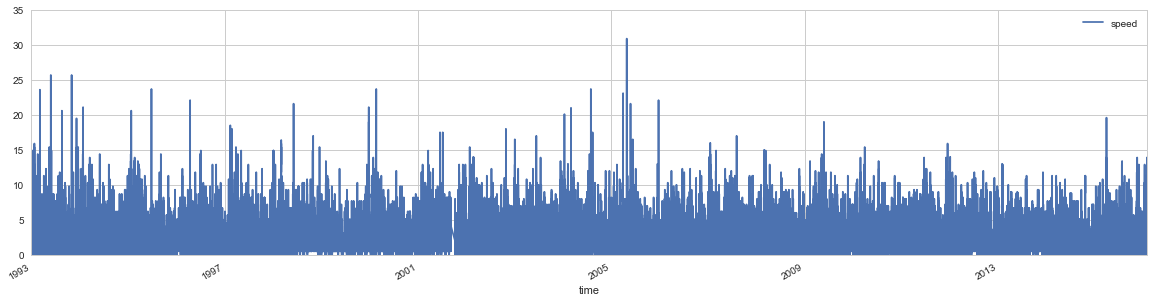

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

True


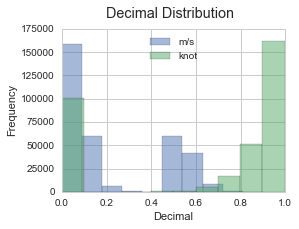

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

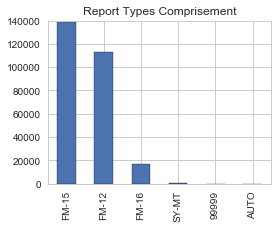

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

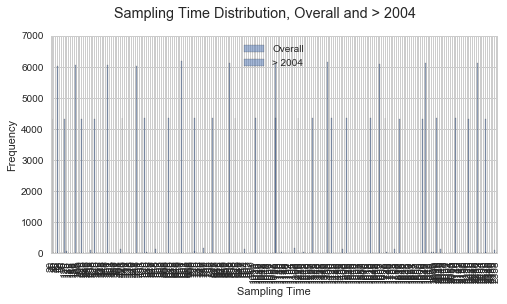

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[20]


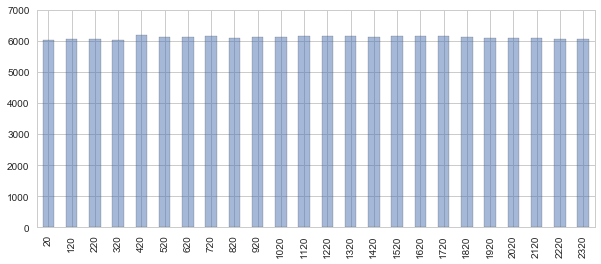

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1993-03-13 16:20:00  19930313  1620  FM-15  238      2         N      3   
1998-12-22 01:20:00  19981222   120  FM-15  234      4         N     12   
2000-08-13 00:20:00  20000813    20  FM-15  339      1         N      8   
2000-09-09 04:20:00  20000909   420  FM-15  152      1         N      9   
2000-11-03 17:20:00  20001103  1720  FM-15  199      2         N     11   
2001-05-01 05:20:00  20010501   520  FM-15  116      1         N      5   
2001-06-04 09:20:00  20010604   920  FM-15  171     15         N      6   
2001-08-02 03:20:00  20010802   320  FM-15   68      3         N      8   
2002-05-17 10:20:00  20020517  1020  FM-15  224      4         N      5   
2004-11-25 01:20:00  20041125   120  FM-15   88      2         N     11   
2005-06-20 01:20:00  20050620   120  FM-15  115      2         N      6   
2005-07-22 04:20:00  20050722   420  FM-15  251      3         N      7   
2005-09-12 00:20:00  20050912    20  FM-15  145      1         N      9   
2005-09-12 01:20:00  20050912   120  FM-15  145      1         N      9   
2005-09-18 12:20:00  20050918  1220  FM-15   49      1         N      9   
2006-03-28 09:20:00  20060328   920  FM-15  227      6         N      3   
2006-07-24 00:20:00  20060724    20  FM-15  118      1         N      7   
2007-05-08 18:20:00  20070508  1820  FM-15  205      8         N      5   

                     dir_windrose  
time                               
1993-03-13 16:20:00           212  
1998-12-22 01:20:00           216  
2000-08-13 00:20:00           111  
2000-09-09 04:20:00           298  
2000-11-03 17:20:00           251  
2001-05-01 05:20:00           334  
2001-06-04 09:20:00           279  
2001-08-02 03:20:00            22  
2002-05-17 10:20:00           226  
2004-11-25 01:20:00             2  
2005-06-20 01:20:00           335  
2005-07-22 04:20:00           199  
2005-09-12 00:20:00           305  
2005-09-12 01:20:00           305  
2005-09-18 12:20:00            41  
2006-03-28 09:20:00           223  
2006-07-24 00:20:00           332  
2007-05-08 18:20:00           245

sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
2004-07-30 13:20:00  20040730  1320  FM-15  270     46         N      7   
1995-06-28 15:20:00  19950628  1520  FM-15   70     46         N      6   
2000-02-21 05:20:00  20000221   520  FM-15  160     46         N      2   
2005-03-31 03:20:00  20050331   320  FM-15   70     45         N      3   
2005-12-24 01:20:00  20051224   120  FM-15  210     43         N     12   
1998-06-06 13:20:00  19980606  1320  FM-15   30     42         N      6   
2005-05-26 06:20:00  20050526   620  FM-15   50     42         N      5   
1994-01-28 03:20:00  19940128   320  FM-15  210     41         N      1   
1999-12-26 13:20:00  19991226  1320  FM-15  190     41         N     12   
2004-01-12 22:20:00  20040112  2220  FM-15  180     39         N      1   

                     dir_windrose  incre  incre_reverse  
time                                                     
2004-07-30 13:20:00           180   40.0           42.0  
1995-06-28 15:20:00            20   42.0           40.0  
2000-02-21 05:20:00           290   40.0           40.0  
2005-03-31 03:20:00            20   40.0           41.0  
2005-12-24 01:20:00           240   40.0           38.0  
1998-06-06 13:20:00            60   41.0           40.0  
2005-05-26 06:20:00            40   40.0           38.0  
1994-01-28 03:20:00           240   18.0           20.0  
1999-12-26 13:20:00           260   35.0            3.0  
2004-01-12 22:20:00           270    9.0           19.0

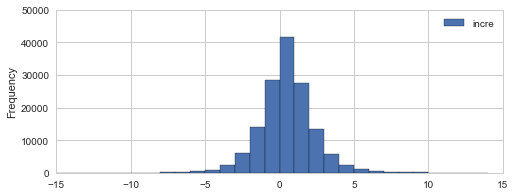

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 12


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1994-01-28 03:20:00  19940128   320  FM-15  210     41         N      1   
1999-12-26 13:20:00  19991226  1320  FM-15  190     41         N     12   
2004-01-12 22:20:00  20040112  2220  FM-15  180     39         N      1   
2015-03-31 11:20:00  20150331  1120  FM-15  190     38         N      3   
1999-12-26 14:20:00  19991226  1420  FM-15  180     38         N     12   
2002-10-27 19:20:00  20021027  1920  FM-15  190     33         N     10   
2003-01-02 22:20:00  20030102  2220  FM-15  200     32         N      1   
2011-12-16 20:20:00  20111216  2020  FM-15  190     31         N     12   
2002-10-27 18:20:00  20021027  1820  FM-15  190     31         N     10   
2015-03-31 14:20:00  20150331  1420  FM-15  190     30         N      3   

                     dir_windrose  incre  incre_reverse  
time                                                     
1994-01-28 03:20:00           240   18.0           20.0  
1999-12-26 13:20:00           260   35.0            3.0  
2004-01-12 22:20:00           270    9.0           19.0  
2015-03-31 11:20:00           260    8.0           12.0  
1999-12-26 14:20:00           270   -3.0           12.0  
2002-10-27 19:20:00           260    2.0            8.0  
2003-01-02 22:20:00           250    4.0            9.0  
2011-12-16 20:20:00           260    7.0            6.0  
2002-10-27 18:20:00           260   10.0           -2.0  
2015-03-31 14:20:00           260    3.0           10.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       2549
10      4000
20      4747
30      5569
40      4423
50      5073
60      3987
70      3751
80      3274
90      3337
100     2755
110     2705
120     1947
130     2205
140     1940
150     2327
160     3027
170     5878
180     6733
190     8659
200     7810
210     9518
220     6473
230     5171
240     3538
250     3485
260     2715
270     2442
280     1699
290     1658
300     1257
310     1337
320     1208
330     1448
340     1518
350     2180
999    14359
Name: dir, dtype: int64

36 10.0


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0720376574715


0     8694
2     2539
1     2514
3      607
4        3
6        1
16       1
Name: speed, dtype: int64


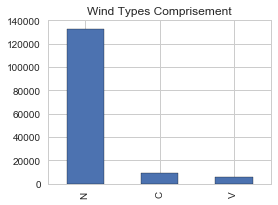

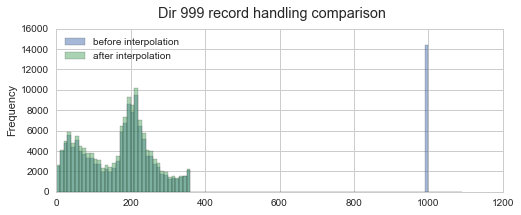

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

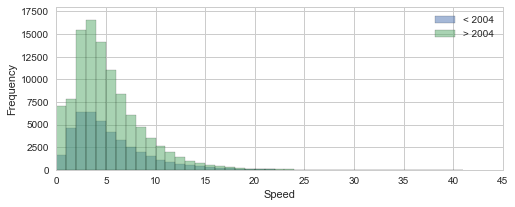

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

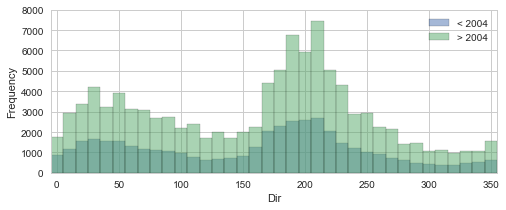

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

1993 - 1994


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


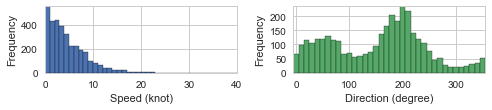

1995 - 1999


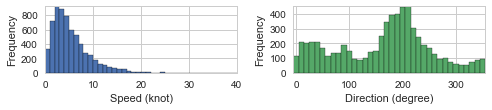

2000 - 2004


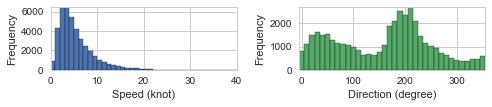

2005 - 2009


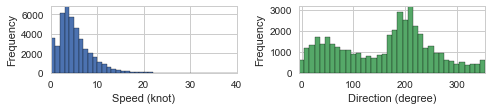

2010 - 2014


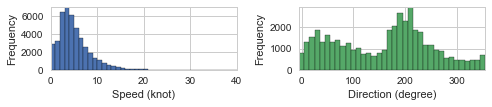

2015 - 2016


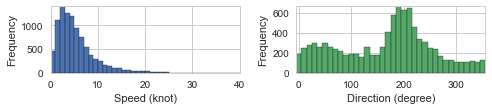

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 14.0)

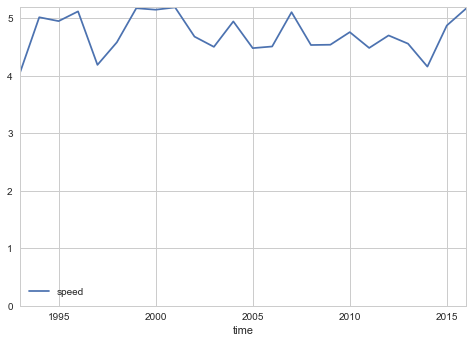

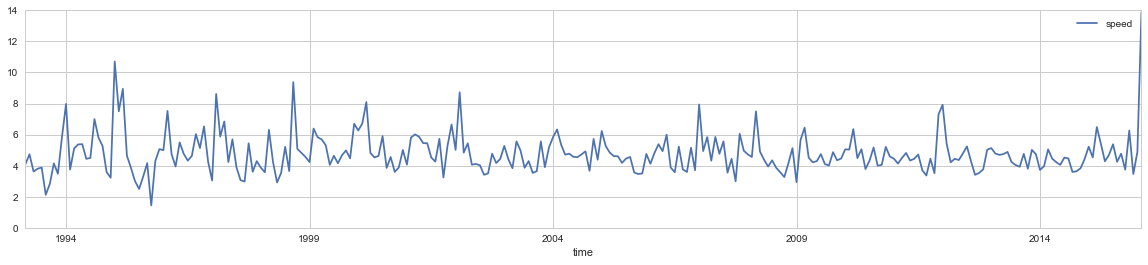

In [24]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [25]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAD75JREFUeJzt3WtMVOe+x/HvMCMwDKDiDSOBjVpP22NTW42kxxQTU9u+
qBqqVojRnWKMti9sY61KqxUVBZr6oqchtjZtarAnpx7qNmmzq9X0nG2OHk2xYmi9dGsUBAW5DMxV
5vacF8gULDBcZs0s5f9JTJi15mH9RX6zxjXP818GpZRCCBFWMdEuQIhHkQRLCA1IsITQgARLCA1I
sITQgARLCA1IsHSmoaGBDRs2kJWVxbx58ygoKKC9vR0Ar9fLrl27yMrKIisriw8//BC/3x8cO9z9
IoyU0A2fz6dycnJUfn6+unz5srp48aLKyclR69atU0opVVJSohYuXKguXLigTp8+rebNm6fKysqC
44e7X4SPBEtHqqur1YwZM9Tdu3eD2yorK4Pbnn76aXXy5MngviNHjqjnnntO+f1+de/evWHtF+Fl
ivYZU/xhypQpfP7550yYMCG4zWAwAFBfX4/b7Wbu3LnBfXPmzKGlpYXa2lra2tqGtf8vf/mL9n/B
EUT+j6UjY8eOJTs7u8e2r776ioyMDBobGzGbzSQlJQX3dQWwoaFh2PtFeMkZS8cOHDjAiRMn+PTT
T7FarcTFxfXYHxsbC4DH48Htdg9rvwgvOWPpVFlZGfv27WPbtm3Mnz+f+Pj4PwWg67HZbB72fhFe
csbSoT179lBeXk5hYSF5eXkApKam4nK5cDgcJCYmAtDU1ATApEmTGDVq1LD2i/CSM5bOfPzxxxw6
dIji4uJgqAAef/xxzGYz58+fD26rrKxk/PjxpKenD3u/CC9jYWFhYbSLEJ0uXbrE5s2byc/PZ/Hi
xbhcruAfi8VCa2srBw8eZObMmdTU1LBz505Wr17NnDlzMJlMNDc3D3m/CC+DUvpY6Nj9lXSkOnz4
MEePHu11X2lpKZMmTeLgwYOcPXuWUaNGkZ2dTW5uLjExnW88PB7PsPaLvs2ePXtwA6L9QVqXysrK
aJegixqU0kcdeqhBKX3UMZQa5KVKCA1IsITQgARLCA1IsITQgARLCA08VDMvAoEAVqs1+Hjs2LFy
qVjo0kMVLKvVytfnvsWSnIjT5mBl1lLGjRsX7bKE+JOHKlgAluREksYkR7sMIfol76OE0IAESwgN
6P6tYPcLFq2trSh9TG0Uol+6D1b3CxZ3b90hfrQFs8WM1+OVkAndChmsQCBAYWEhV69eJTY2lqKi
IjIyMno8x+128/rrr7Nnzx6mTZsGQE5OTnBBXVpaGsXFxUMusuuChbXJyp0mGz6jBVtrOy6Xa8jf
UwgthQzWyZMn8Xg8fPPNN1RVVVFSUsL+/fuD+6urq9mxYweNjY3BbR0dHSilKC8vD3vBxhgTplGj
MJp0f7IVI1jI387z58/z/PPPAzBr1ix+/fXXHvs9Hg9lZWVs3rw5uO3KlSu43W7y8/Px+Xxs3LiR
WbNmhSymtzVZVquVuuY6LLZE7ty5gxsjptZ47O1tVFdXB5eXh4te1oXpoQ491AD6qWMwQgare48E
AKPRiM/nw3T/jNHbArD4+HjWrFnD8uXLuXnzJmvXruXYsWPBMX3p7XvV1tbyj6ZLKGMSfmJJtJhJ
SUkhxh8gLS2NtLS04HOHOxPj/Pnzg1/QpgE91KGHGvRSx1CCHTJYiYmJOJ3O4ONAIBAyIJmZmWRk
ZGAwGMjMzGTMmDE0NTUxefLkQRcIYDR1vv2LMY0KbnM7XXx/5SSp9s7vKTMxhJ6EfHl/9tlnOXXq
FABVVVXMmDEj5DetqKigpKQEgMbGRhwOR4/uruGSkGQhaUwySWOSsSQnhh4gRISEPGMtXLiQ06dP
k5ubi1KKvXv38t133+FyuVixYkWvY5YtW0ZBQQF5eXkYDAb27t0b8iwnxKMk5G97TEwMu3bt6rGt
65J6d92vAMbGxrJv374wlCfEw0mmNAmhgYf2/ZkCvF4f3vttkmUmhtCThzZYfp+fhhY7hvjOK5Yy
E0PoyUMbLACTsfMyPCAzMYSuyP+xhNCABEsIDUiwhNCABEsIDUiwhNCABEsIDUiwhNCABEsIDUiw
hNBAyGAFAgE++OADVqxYwapVq6ipqfnTc9xuN7m5uVy/fn3AY8JN3W+T1tLSQktLC4FAQPNjCtGX
kMHq3kzmnXfeCS5g7FJdXc3KlSu5devWgMdoweV08bdfj/FfF7/nq//9T1pbWzU/phB9CRmsgTaT
mTp16oDHaMHv82PrCGD3xtDm8suEXBFVmjSTCTWmL7017WhoaKCtvQ2/AWy2dkxxo4hrbe3xNfyx
z2a3Y3c6htzBSS8dgfRQhx5qAP3UMRiaNJMZyhjou0vTz64aRqek4GxtxxRnIuWBr4Eej40Knnrq
KdLT00Meszs9dATSSx16qEEvdQwl2Jo0kxnKGCEeJZo0k+ltjBAjiSbNZHobI8RIIh8QC6EB3a1n
V0r1uFTucrmQFjHiYaO7YDkcDo794yJxcWYA6upu4o/3RbkqIQZHd8GyWq1UNp0lacxoAG631ZKY
MribeSs6z3Rdl/wTEhIwGAzhLlWIPukuWADmxAQso5MAiLckDHq8z+Phv89dYsotJx0dbl6e/zRJ
SUnhLlOIPukyWMPldrq57K2mxdGCva2dLGu6BEtE1CMZLID4+2c9n88b7VLECCSX24XQgARLCA1I
sITQgARLCA08shcvunQt2bdYLMFtw70JuBCh6CpYTqcz7FOYupbsp7akdh7D7uCv81Ywfvz4MB5F
iJ50FazKS43U1twi4PeH7Xv6fX5sgMXbeYayybJ9EQEhgxUIBCgsLOTq1avExsZSVFRERkZGcP9P
P/1EWVkZJpOJpUuX8tprrwGQk5MTXJ6flpZGcXFxyGLMCQmdcwTDPDVQ7qMlIi3kb1n3jktVVVWU
lJSwf/9+ALxeL8XFxVRUVGA2m8nLy2PBggUkJSWhlOqxRkuIkWRYXZquX79Oeno6o0ePJjY2ltmz
Z/Pzzz9z5coV3G43+fn5rF69mqqqKu3+BkLo0LC6NDkcjh5z8CwWCw6Hg/j4eNasWcPy5cu5efMm
a9eu5dixYyEbyly7do36upu0m9rAZAT67szUV5emUM+zt7f128FJLx2B9FCHHmoA/dQxGMPq0vTg
PqfTSVJSEpmZmWRkZGAwGMjMzGTMmDE0NTUxefLkfo81ffp0TDFgc1p77b400C5N/T3P4A+QkpLC
hAkTAJgyZQpGY2eI9dARSC916KEGvdQR8S5N06ZNo6amhra2NjweD5WVlTzzzDNUVFQEu982Njbi
cDiCv8jR5mi3U175d7489z3/fvxr6uvro12SeAQNu0vT1q1bWbNmDUopli5dyqRJk1i2bBkFBQXk
5eVhMBjYu3fvgPoKRkpicjKjx6VEuwzxCBt2l6YFCxawYMGCHvtjY2PZt29fmEoU4uGjn9NIFDw4
3UnuUCLCZUQHq/t0J6fdwdOWf4l2SeIRMaKD1X26k83lp8PUEe2SxCNixE/x7pruJFOdRDjJb9N9
KhDAZrPR0tIS3CbLS8RQSbDuczld/J+jlvaLHkCWl4jhkWDd5/f5cSsTdlleIsJAgtWNMcYYXF4S
ExPT41K8vC0UgyHB6sODl+LlbaEYDAlWH7pfim93eKmvrw/2f5ezlwhFgtWPrkvxHR2e4NnL3m5j
yb++xLhx44A/Zmt0BU1CJ0CCNSDdz153muz8x89/I3VyZ3Oau/UNxCWYGT9pPE6bg5VZS4OhEyOX
vLQO0B99MwzYOgLYvTHYvTG0uf0YTDHEJ8QTGx+HUnKbPCFnrCHp3pwGDDS02DHEO2lrbuWf5n/i
crkIBAIkJCQ

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOQAAAB6CAYAAACvO/++AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFQ5JREFUeJztnX9sk9e5xz+xHSeO84OfgV5uQ0dUBCM3LS0rVNyCisqY
JmjUQkNCSa6gnWCTxtpNHc02WNaEAZPWaaooG92modAJIqg69aotbaF3vaOlbQg/BoGycSEQAont
2E5sJ7Zjn/uHyZvYJHEg/vG+8flIUXPe8543zzH9+pz3Oc95TpoQQiCRSFSBLtkGSCSSfqQgJRIV
IQUpkagIKUiJREVIQUokKkIKUiJREVKQGubmzZts2rSJ+fPns3DhQqqqqnA6nQD4/X5eeeUV5s+f
z/z58/nVr35FIBBQ2o62XhInhEST9Pb2iqeeekqsX79enD9/Xpw+fVo89dRTYsOGDUIIIXbs2CGW
Ll0qTp48KY4dOyYWLlwodu3apbQfbb0kPkhBapR//OMfYubMmaK9vV251tDQoFx74IEHxEcffaTU
vfXWW+LRRx8VgUBA9PT0jKpeEj8MyR6hJXfHtGnTeOONN5g8ebJyLS0tDYDr16/T3d3NI488otTN
mzcPm83G1atXcTgco6q/77774t/BFEW+Q2qU8ePHs2jRorBrf/7zn5k+fTptbW2YTCZycnKUuj7h
3rx5c9T1kvghR8gxwp49e/jwww/53e9+h91uJyMjI6zeaDQC4PP56O7uHlW9JH7IEXIMsGvXLn79
61/zs5/9jMWLF5OZmXmbcPrKJpNp1PWS+CFHSI2zbds26urqqK6upry8HICpU6fi8XhwuVxkZ2cD
YLFYAJgyZQrp6emjqpfEDzlCapjf/va37Nu3j+3btytiBJg1axYmk4kTJ04o1xoaGpg0aRIFBQWj
rpfED311dXV1so2Q3DlNTU38+Mc/Zv369Tz55JN4PB7lx2w209HRwd69eykqKqK5uZlf/OIXVFZW
Mm/ePAwGA1ar9a7rJfEjTQjtbVAe+M2dqtTX1/P2228PWrdz506mTJnC3r17OX78OOnp6SxatIiy
sjJ0utCkyOfzjapeMjQPP/zwXbfVrCBH0+lEIe2MLVqwc7Q2yq87iURFSEFKJCpCClIiURFR1yGD
wSDV1dV89dVXGI1GamtrmT59ulJ/9OhRdu3ahcFgYOXKlZSWlg7Z5sUXX8RqtQKheMsHHniA3/zm
N9TW1tLY2IjZbAbg9ddfDwvbkkhShmjR54cPHxabN28WQghx8uRJsXHjRqXO5/OJJ554QjgcDuH1
esXTTz8tLBbLsG2EEMLhcIgnn3xStLW1CSGEKCsrEzabbcQR8Q0NDSO+N5lIO2OLFuwcrY1Rp6wn
TpzgscceA+DBBx/k7NmzSt2lS5coKCggLy8Po9HIww8/zJdffjlsG4DXXnuNtWvXkp+fTzAYpLm5
ma1bt1JWVsbBgwdj+X0jkWiKqFPWgeFTAHq9nt7eXgwGAy6XK2xqaTabcblcw7ax2Wx89tlnVFVV
AeDxeFi7di3r1q0jEAhQWVlJUVERs2bNGtYuraxFSjtji1bsvFuiCjI7Oxu3262Ug8EgBoNh0Dq3
201OTs6wbd5//32WL1+OXq8HQsHKlZWVStDyggULuHDhQlRBqn09CrSxbgbSzlgy2i+MqFPWhx56
iE8++QSAU6dOMXPmTKWusLCQ5uZmHA4HPp+PhoYG5s6dO2ybzz77LGwf35UrVygvLycQCOD3+2ls
bGTOnDmj6pREolWijpBLly7l2LFjlJWVIYTgl7/8Je+88w4ej4fVq1fz8ssv89xzzyGEYOXKlUyZ
MmXQNn1cvnyZe++9VykXFhZSUlJCaWkp6enplJSUcP/998entxKJypGhc3FE2hlbtGDnaG2U+yEl
YQgh8Hg8YdeysrKUfD2S+CIFKQnD4/Hw98bLZGZmAdDT4+E/H/qaErQhiS9SkJLbyMzMwpSVlWwz
UhIZyyqRqAg5QkrCCAaDOB12fL4eALo93QSDk6O0ksQKKcgUI9JpEwwGsdvt2Gw2AFpaWvj7taPk
jh8HQJfDyYP2yTLYP0FIQaYYLpeL9/92moyMUGSU1XKTr9xf0pzZDsD1y9fQp6djzgsJsLfXnzRb
UxEpyBTDbrfTYDlOzrg8ANptreTk6skZlwtAVnY23S5vMk1MaaQgUxBTdpYyAmbaTYAUoFqQXlaJ
REVIQUokKkJOWccwfR7UgdjtdgZGLwugt7cX/62zO3oD0omTTKQgxzB2u503Pz+EObd/s/j1y9fw
ka6UA70BHN1+Wi2h/as32zsxmuWBOslCCnKMY87NVjyoMLgXVa/TY0gPiVRnSEeSPOQ7pESiIqQg
JRIVIaesY4hIJ05HRwca3H+e0iQ0UXJTUxMbNmzgvvvuA6C8vJxvf/vb1NfXs3//fgwGA9/97nd5
/PHH49bhsUykE6e95Sa5E/OAvOQaJhkxUQX50Ucf4fP5OHDgAKdOnWLHjh3s3r0bAL/fz/bt2zl4
8CAmk4ny8nKWLFlCY2PjoG3OnTvHunXrWL9+vfJ8i8VCXV0dhw4dwuv1smbNGhYuXKicaS+5MwY6
cVzOriRbI7lTogpypImSASVR8qlTpwZtc/bsWS5fvsyRI0eYPn06P/nJTzhz5gxz587FaDRiNBop
KCjgwoULFBcXx7yzKYcQ+Px+ZY0R5Dqj2kloouTi4mKeeeYZioqK2L17N7t27WLWrFmDPiMaWkmY
m0g7HQ4HbfabuDyhz6/1xg0cPQHau/qXOdqaWzCaTBhMmQB0djoxZKTT0dERVs7oK3d0cPToUSZP
7t8TOXnyZCWvbqLRyr/73ZLQRMlLly4lNzc0nVq6dCk1NTXMmzdv0GdEQ+3ZxyDxWdJsNhtXzrcp
U1a/24/O5SV/8hTlHq/TgyHDwIQJEwBwdzjxeD1h5cj6L7oukW8O7aF0OZxs+o9nKSgoSFi/+tBK
1rnRkNBEyc899xxnzpwBQgmT58yZQ3FxMSdOnMDr9dLV1cWlS5fC/oYk+WTn5pI3cQJ5EyeQPU46
iOJJQhMlV1dXU1NTQ3p6OpMmTaKmpobs7GwqKipYs2YNQghefPFFMjIy4t5xiUSNRBWkTqfjlVde
CbtWWFio/L5kyRKWLFkStQ3AnDlz2L9//23XS0tLKS0tHbHREslYRQYGjCGEEPh9frlzQ8NIQY4h
PB4P19uc5PpDrgG5c0N7SEGOMfQGg9y5oWFkcLlEoiJSYoSUB8jEDkFoajxw7Rjk5xkrUkKQ8gCZ
2BHo7aWh6TptXf2xxvLzjB0pIchgMIi3x4tOF5qhe3u8BINBpV6OoHdGRoZJHsYTJ1JCkHa7nWMt
HyvJgSPT48sRVKIWUkKQEJ4ceLD0+PIItpEhgkG6Op04HR3KNXkgT+xIGUGORSIzBESmeIwH3e5u
Tvm/oDWzRbkmD+SJHWNOkIO9D3o8HsZiIovIDAGRKR7jReaA2QaA3+fFbreHTfHHjx+vvLNLRs6Y
E2Tk6U4ALS1XCGT2KuVI173b7dZs7pmBGQKSdVBOt9vDf1/4iKld9wDg7nTx7PyVTJw4MeG2aJ0x
J8jI050AWh1XyZ7Qn5s00nXvsFvJzMomSzpx7pqsHHNY/lfJ3THmBAnhDhyATHO4s0YEg/i8PuWU
YK/XhzEzfBlELnxLksGYFGQ0Ih0TdquVBbrFTJw4CYCenm6On3GQlzc+dH+3m4dmTbltGUSKVBJr
NC/ISCfOSB04Ax0T3R53mCu/0+kgJ2+csgzS3e3h+JlrikBBrlUORAB+f/+BPX6fX7Pv5MlG84KM
XNS/2nyNYCBwR8+INmICZGTK6JShCPQGuGnrIi0zNM13WDv4p+mfYV+U06ZNS1piLC2R0ETJ58+f
p6amBr1ej9F

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF2JJREFUeJzt3W1MlGe+BvBrgIHSeam1rolZHAvWSasEeYvdjSOuJ2sx
Te2LkYkzZpos6CqtWmywIKJIhqqki9lgxW679MPBAjvRzZ6m3U13NVZioX54dpEAZc1yXHytRXR1
nlFmFO7zoXGOU0bgpswM4PX7BPfcw//+B3LxzPOqEUIIEBHRqEVFegFERJMNg5OISBKDk4hIEoOT
iEgSg5OISBKDk4hIUsxwL969exclJSW4dOkSfD4f8vPzMWvWLGzYsAFPP/00AMBms+HFF1+Ey+VC
Y2MjYmJikJ+fj2XLlqG/vx/btm1DX18fdDodKisrMX36dLS2tuLdd99FdHQ0LBYLNm3aFI5eiYjG
hxjGkSNHREVFhRBCiBs3boilS5cKl8slamtrA+Z999134qWXXhJer1fcunXL//XHH38sqqurhRBC
fPbZZ8LpdAohhHj55ZdFT0+PGBwcFOvWrRMdHR3DLYOIaEIZ9qP6ihUr8NZbb90PWERHR6O9vR1f
fvkl1q5di5KSEqiqira2NqSlpSE2NhYGgwEmkwldXV1QFAVLliwBAGRlZaGlpQWqqsLn88FkMkGj
0cBisaC5uTn0/yGIiMbJsB/VdTodAEBVVWzZsgUFBQXw+XzIyclBcnIyDh06hIMHD+LZZ5+FwWAI
eJ+qqlBV1T+u0+ngdruhqir0en3A3AsXLoy4UEVRxtQgEdFIMjIypOYPG5wAcOXKFbz55puw2+1Y
uXIlbt26BaPRCABYvnw5nE4nMjMz4fF4/O/xeDwwGAzQ6/X+cY/HA6PRGDD24HgomhsviqKwNmuz
9hSuLWvYj+rXrl1Dbm4utm3bhtWrVwMA8vLy0NbWBgBoaWnBggULkJKSAkVR4PV64Xa70d3dDbPZ
jPT0dJw8eRIA0NTUhIyMDOj1emi1Wpw/fx5CCJw6dQqZmZnSCyciipRhtzg/+OAD3Lp1CzU1Naip
qQEAFBcXY8+ePdBqtZgxYwacTif0ej0cDgfsdjuEENi6dSvi4uJgs9lQVFQEm80GrVaLqqoqAEB5
eTkKCwsxMDAAi8WChQsXhr5TIqJxMmxwlpaWorS0dMh4Y2PjkDGr1Qqr1RowFh8fj+rq6iFzU1NT
4XK5ZNdKRDQh8AR4IiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkjXqs+1QwM
DKC7uzvoa3PnzkV0dHSYV0REk80jF5zd3d1wbK/H40/MDBi/ffM71O21w2w2R2hlRDRZPHLBCQCP
PzET+id/GullENEkxX2cRESSGJxERJIYnEREkhicRESSpuzBoYeddnTu3LkIrIaIppIpG5wPO+2o
7+I3eCrhuQitioimgikbnEDw045u37waodUQ0VTBfZxERJIYnEREkhicRESSGJxERJIYnEREkhic
RESSGJxERJKGPY/z7t27KCkpwaVLl+Dz+ZCfn49nnnkGxcXF0Gg0mDdvHsrKyhAVFQWXy4XGxkbE
xMQgPz8fy5YtQ39/P7Zt24a+vj7odDpUVlZi+vTpaG1txbvvvovo6GhYLBZs2rQpXP0SEf1ow25x
fvrpp5g2bRrq6+vx+9//Hk6nE3v37kVBQQHq6+shhMDx48fR29uLuro6NDY2ora2Fvv374fP50ND
QwPMZjPq6+vx6quvoqamBgBQVlaGqqoqNDQ04MyZM+js7AxLs0RE42HYLc4VK1YgOzsbACCEQHR0
NDo6OrBo0SIAQFZWFr766itERUUhLS0NsbGxiI2NhclkQldXFxRFwbp16/xza2pqoKoqfD4fTCYT
AMBisaC5uRnz588fcbGKooy6sZ6enlHPva+9vR1ut/tH1x5vrM3arD2xDBucOp0OAKCqKrZs2YKC
ggJUVlZCo9H4X3e73VBVFQaDIeB9qqoGjD84V6/XB8y9cOHCqBabkZEx6sYMBgPw2bejng8AycnJ
QR+doSiKVO3xxNqszdqhry1rxGvVr1y5gjfffBN2ux0rV67Ee++953/N4/HAaDRCr9fD4/EEjBsM
hoDx4eYajUbphY83MTj40DsnDQwMhHk1RDSRDRuc165dQ25uLnbt2oWf//znAID58+fj9OnTeP75
59HU1ISf/exnSElJwW9/+1t4vV74fD50d3fDbDYjPT0dJ0+eREpKCpqampCRkQG9Xg+tVovz589j
9uzZOHXq1IQ4OHTH3YtdH17D408E3oru9s3vULQ2xb97goho2OD84IMPcOvWLdTU1PgP7OzYsQMV
FRXYv38/kpKSkJ2djejoaDgcDtjtdgghsHXrVsTFxcFms6GoqAg2mw1arRZVVVUAgPLychQWFmJg
YAAWiwULFy4MfaejwIe4EdFoDBucpaWlKC0tHTJ++PDhIWNWqxVWqzVgLD4+HtXV1UPmpqamwuVy
ya6ViGhC4AnwRESSGJxERJIYnEREkhicRESSGJxERJIYnEREkhicRESSGJxERJIYnEREkhicRESS
GJxERJIYnEREkhicRESSGJxERJIYnEREkhicRESSGJxERJIYnEREkhicRESSGJxERJIYnEREkhic
RESSGJxERJIYnEREkkYVnGfOnIHD4QAAdHZ2YsmSJXA4HHA4HPjzn/8MAHC5XFi1ahWsVitOnDgB
AOjv78fmzZtht9uxfv16XL9+HQDQ2tqKnJwcrFmzBu+//34o+iIiCpmYkSZ89NFH+PTTTxEfHw8A
6OjowK9+9Svk5ub65/T29qKurg5Hjx6F1+uF3W7H4sWL0dDQALPZjM2bN+Pzzz9HTU0NSktLUVZW
hgMHDmD27Nn49a9/jc7OTsyfPz90Xf4IYnAQly9fxtmzZ4O+PnfuXERHR4d5VUQUSSMGp8lkwoED
B/DOO+8AANrb23Hu3DkcP34cc+bMQUlJCdra2pCWlobY2FjExsbCZDKhq6sLiqJg3bp1AICsrCzU
1NRAVVX4fD6YTCYAgMViQXNz84QNzjvuXtSd0ODo348Nee32ze9Qt9cOs9kcgZURUaSMGJzZ2dm4
ePGi//uUlBTk5OQgOTkZhw4dwsGDB/Hss8/CYDD45+h0OqiqClVV/eM6nQ5utxuqqkKv1wfMvXDh
wqgWqyjKqBvr6ekZ9dyRPP7ETOif/GnQ19rb2+F2u8etVjAyfbM2a7N26I0YnD+0fPlyGI1G/9dO
pxOZmZnweDz+OR6PBwaDAXq93j/u8XhgNBoDxh4cH42MjIxRr9NgMACffTvq+WOVnJwc0i1ORVGk
+mZt1mZt+dqypI+q5+Xloa2tDQDQ0tKCBQsWICUlBYqiwOv1wu12o7u7G2azGenp6Th58iQAoKmp
CRkZGdDr9dBqtTh//jyEEDh16hQyMzOlF05EFCnSW5y7d++G0+mEVqvFjBkz4HQ6odfr4XA4YLfb
IYTA1q1bERcXB5vNhqKiIthsNmi1WlRVVQEAysvLUVhYiIGBAVgsFixcuHDcGyMiCpVRBWdCQgJc
LhcAYMGCBWhsbBwyx2q1wmq1BozFx8ejurp6yNzU1FT/zyMimmx4AjwRkSQGJxGRJAYnEZEkBicR
kSQGJxGRJAYnEZEkBicRkSQGJxGRJAYnEZEkBicRkSTpa9UnmoGBAXR3dw8ZP3fuXARWQ0SPgkkf
nN3d3XBsr8fjT8wMGO+7+A2eSnguQqsioqls0gcnEPxGw7dvXo3QaohoquM+TiIiSQxOIiJJDE4i
IklTYh9npIjBwYcevedjg4mmLgbnj3DH3YtdH17D408Eng7FxwYTTW0Mzh9puEcHE9HUxH2cRESS
GJxERJIYnER

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGbJJREFUeJzt3X1sU9f9BvDHL3EabAeWTUjoB94IjbWyKM3boBMhXaSt
6SZoGQILG7nbgA4yCktWglMgBJS0LKKJWNgyygSa5kBSq0FbVTZ1K+uS8dKsui2gBDI0C6WFwIDA
hq9LnOCc3x9dvLoxebn4NXk+UiVy7nXu956kT+49vudYJYQQICKiCVPHugAiokTFACUiUogBSkSk
EAOUiEghBigRkUIMUCIihcYVoOfOnYPdbgcAXLx4ETabDXa7HWvXrsWtW7cAAC6XC8uXL4fFYsG7
774LAOjv78emTZtgs9nw/PPP4/bt2wCAs2fPYuXKlVi1ahV+8YtfROK8iIgiT4zh4MGDYsmSJWLl
ypVCCCFWr14tLly4IIQQorm5Wbzyyivixo0bYsmSJcLn84m7d+8G/n348GHR0NAghBDirbfeEtXV
1UIIIZ555hnR09MjhoaGxLp160RXV9dYZRARxZ0xr0BNJhP2798f+Lq+vh6PPfYYAMDv9yM5ORnn
z59HTk4OdDodjEYjTCYTuru7IUkSFi9eDAAoLCzEmTNnIMsyBgYGYDKZoFKpUFBQgNOnT0fozwMR
UeRox9qhuLgYV65cCXw9c+ZMAMAHH3yApqYmHDlyBH/7299gNBoD++j1esiyDFmWA+16vR4ejwey
LMNgMATt+/HHH49ZqCRJ4z8rIqIJyMvLU/S6MQM0lD/84Q/41a9+hYMHDyItLQ0GgwFerzew3ev1
wmg0BrV7vV6kpqaG3Dc1NXVcx1V6kuEmSRJrCYG1hMZa4rcO4OEuzib8Lvzvf/97NDU1wel0Ys6c
OQCArKwsSJIEn88Hj8cDt9sNs9mM3NxctLW1AQDa29uRl5cHg8GApKQkfPTRRxBC4OTJk8jPz1d8
AkREsTKhK1C/34+XX34Zs2bNwqZNmwAAX//617F582bY7XbYbDYIIVBWVobk5GRYrVY4HA5YrVYk
JSWhrq4OALB7925s2bIFfr8fBQUFePzxx8N/ZkREETauAJ09ezZcLhcA4O9//3vIfSwWCywWS1Bb
SkoKGhoaRuybnZ0d+H5ERImKD9ITESnEACUiUogBSkSkEAOUiEghBigRkUIMUCIihRigREQKMUCJ
iBRigBIRKcQAJSJSiAFKRKQQA5SISCEGKBGRQgxQIiKFGKBERAoxQImIFGKAEhEpxAAlIlKIAUpE
pNC4PhPp3LlzePXVV+F0OtHT04OKigqoVCpkZGSgqqoKarUaLpcLLS0t0Gq1KCkpQVFREfr7+1Fe
Xo6+vj7o9XrU1tYiLS0NZ8+excsvvwyNRoOCggK88MILkT5PIgCffjCi2+1+4PZ58+ZBo9FEsSJK
ZGMG6K9//Wu8+eabSElJAQDs2bMHpaWlWLhwIXbu3IkTJ04gOzsbTqcTra2t8Pl8sNlsWLRoEZqb
m2E2m7Fp0yYcP34cjY2N2LFjB6qqqrB//37MmTMHP/rRj3DhwgXMnz8/4idL5Ha7YX/pKKZNnzli
2yf/uQHnHhvMZnMMKqNENOYtvMlkwv79+wNfd3V1YcGCBQCAwsJCnD59GufPn0dOTg50Oh2MRiNM
JhO6u7shSRIWL14c2PfMmTOQZRkDAwMwmUxQqVQoKCjA6dOnI3R6RCNNmz4Thi/834j/QoUq0WjG
vAItLi7GlStXAl8LIaBSqQAAer0eHo8HsizDaDQG9tHr9ZBlOaj9s/saDIagfT/++ONxFStJ0vjO
KgpYS2jxXktPT8+or+ns7ITH44lKLbESL7XESx0PY1xjoJ+lVv/votXr9SI1NRUGgwFerzeo3Wg0
BrWPtm9qauq4jp2XlzfRciNCkiTWEkIi1GI0GoG3rj/wdZmZmWG/hU+EfpmqdQAPF+QTfhd+/vz5
6OjoAAC0t7cjPz8fWVlZkCQJPp8PHo8HbrcbZrMZubm5aGtrC+ybl5cHg8GApKQkfPTRRxBC4OTJ
k8jPz1d8AkREsTLhK1CHw4HKykrU19cjPT0dxcXF0Gg0sNvtsNlsEEKgrKwMycnJsFqtcDgcsFqt
SEpKQl1dHQBg9+7d2LJlC/x+PwoKCvD444+H/cSIiCJtXAE6e/ZsuFwuAMDcuXPR1NQ0Yh+LxQKL
xRLUlpKSgoaGhhH7ZmdnB74fEVGi4oP0REQKMUCJiBRigBIRKTThN5GI4sFYUzL9fn8Uq6GpigFK
CWmsKZmO1VmBGXNEkcIApYQ1PCWTKFY4BkpEpBADlIhIIQYoEZFCDFAiIoUYoERECjFAiYgUYoAS
ESnEACUiUogP0tOkI4aG0Nvbi0uXLo3Ydvny5RhURJMVA5QmnXuem3C+q0LrB++M2NZ35SK+OPux
GFRFkxEDlCalB03z/OQ//4pBNTRZcQyUiEghBigRkUIMUCIihRSNgQ4ODqKiogJXr16FWq1GdXU1
tFotKioqoFKpkJGRgaqqKqjVarhcLrS0tECr1aKkpARFRUXo7+9HeXk5+vr6oNfrUVtbi7S0tHCf
GxFRRCm6Am1ra8P9+/fR0tKCjRs3Yt++fdizZw9KS0tx9OhRCCFw4sQJ3Lx5E06nEy0tLTh06BDq
6+sxMDCA5uZmmM1mHD16FMuWLUNjY2O4z4uIKOIUXYHOnTsXfr8fQ0NDkGUZWq0WZ8+eDawAXlhY
iFOnTkGtViMnJwc6nQ46nQ4mkwnd3d2QJAnr1q0L7DveAJUkSUm5EcFaQotWLT09PRH5vp2dnfB4
PGH/vlPxZzSWeKnjYSgK0GnTpuHq1av4zne+gzt37uDAgQN4//33oVKpAAB6vR4ejweyLMNoNAZe
p9frIctyUPvwvuORl5enpNywkySJtYQQzVqMRiPw1vWwf9/MzEyYzeawfs+p+jNKhDqAhwtyRQH6
m9/8BgUFBXjxxRdx7do1fP/738fg4GBgu9frRWpqKgwGA7xeb1C70WgMah/el4go0SgaA01NTQ1c
QU6fPh3379/H/Pnz0dHRAQBob29Hfn4+srKyIEkSfD4fPB4P3G43zGYzcnNz0dbWFtg3Xv4SERFN
hKIr0B/84AfYtm0bbDYbBgcHUVZWhszMTFRWVqK+vh7p6ekoLi6GRqOB3W6HzWaDEAJlZWVITk6G
1WqFw+GA1WpFUlIS6urqwn1eREQRpyhA9Xo9fv7zn49ob2pqGtFmsVhgsViC2lJSUtDQ0KDk0ERE
cYMP0hMRKcQAJSJSiKsxUdzy+/1wu90ht3FdT4oHDFCKW263G/aXjmLa9JkjtnFdT4oHDFCKa1zX
k+IZA5Tov8TQ0KhDA/PmzYNGo4liRRTvGKBE/3XPcxM7D97CtOkjx10/+c8NOPfYwj7NkxIbA5To
Mx40ZEAUCh9jIiJSiAFKRKQQA5SISCEGKBGRQgxQIiKFGKBERArxMSaKKc53p0TGAKWY4nx3SmQM
UIo5znenRMUxUCIihRigREQKKb6Ff+211/CXv/wFg4ODsFqtWLBgASoqKqBSqZCRkYGqqiqo1Wq4
XC60tLRAq9WipKQERUVF6O/vR3l5Ofr6+qDX61FbW4u0tLRwnhcRUcQpugLt6OjAhx9+iObmZjid
Tly/fh179uxBaWkpjh49CiEETpw4gZs3b8LpdKKlpQWHDh1CfX09BgYG0NzcDLPZjKNHj2LZsmVo
bGwM93kREUWcoivQkydPwmw2Y+PGjZBlGVu3boXL5cKCBQsAAIWFhTh16hTUajVycnKg0+mg0+lg
MpnQ3d0NSZKwbt26wL7jDVBJkpSUGxGsJbSJ1tLT0xOhSsKvs7MTHo9H0WsT+WcUKfFSx8NQFKB3
7txBb28vDhw

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

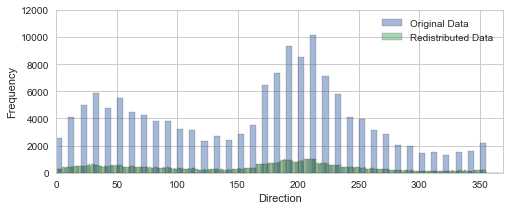

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


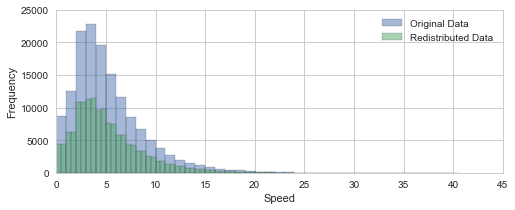

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: FM-15
Sampling time used: [20]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.328200e+04  43282.000000  43282.000000  43282.000000  43282.000000   
mean   2.012063e+07   1169.879858    157.951924      5.034628      6.527194   
std    1.414262e+04    691.217793     92.086096      3.349439      3.458770   
min    2.010010e+07     20.000000     -4.993176      0.000247      1.000000   
25%    2.011033e+07    620.000000     71.966425      2.735636      4.000000   
50%    2.012070e+07   1120.000000    176.540353      4.345909      7.000000   
75%    2.013093e+07   1720.000000    221.072608      6.595957     10.000000   
max    2.014123e+07   2320.000000    354.989647     31.330858     12.000000   

       dir_windrose             x             y  
count  43282.000000  43282.000000  43282.000000  
mean     267.115337     -1.425985     -0.110165  
std      274.793702      4.853131      3.311845  
min        0.000000    -31.201957    -25.347944  
25%       80.000000     -4.323611     -2.282690  
50%      230.000000     -0.698608      0.038467  
75%      280.000000      1.735641      2.209604  
max      999.000000     18.770107     13.989443

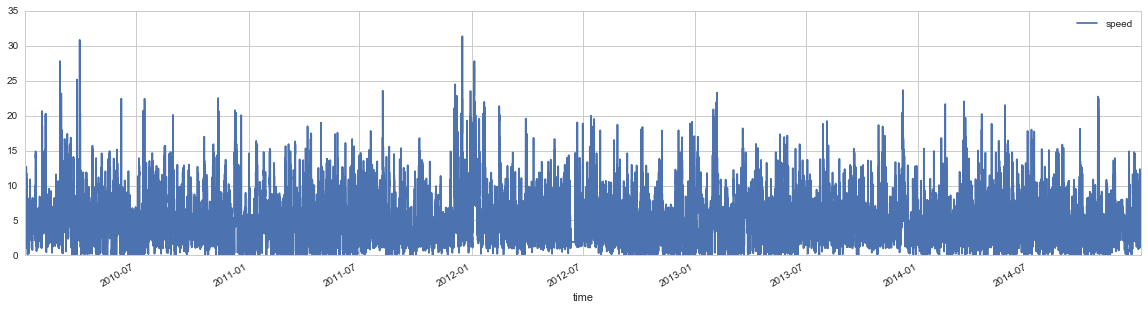

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

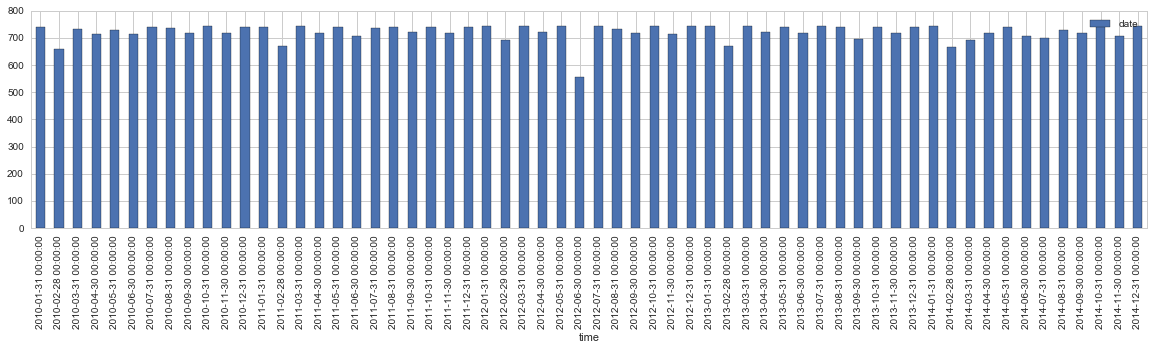

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


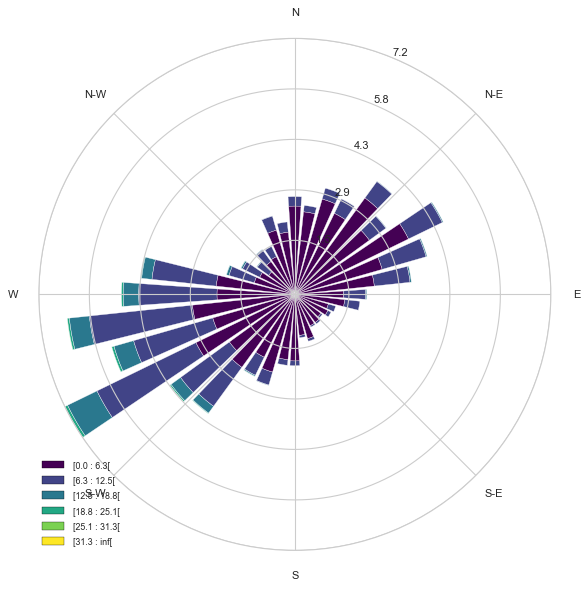

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASEAAADPCAYAAAC6JGddAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX6wPHPsCOIoKiIC+L2KzGvW5J7VyXN0pJFWcJ+
gltZZrmgJopigVr3diskU6ubZmq2addrmRs3t0AvqeCSS5qByCICg4A48/vDHxPIjsycYXjer9e8
krM9z1F7POfM93wflVar1SKEEAoxUzoBIUTjJkVICKEoKUJCCEVJERJCKEqKkBBCUVKEhBCKslA6
AX04fvy40ikI0aj17du3xtvqrQhpNBoiIiI4d+4cVlZWrFixAjc3tzLb3L59m8mTJ/PGG2/QuXNn
vvrqK77++msACgsLOXPmDIcOHeLatWtMnz6djh07AhAQEMCYMWOqjF+b34T6dvz4cYkv8Rt1/NrQ
WxH68ccfKSoqYuvWrSQmJhIdHU1sbKxu/alTp1i6dClpaWm6Zd7e3nh7ewOwbNkyfHx8cHBwICkp
icmTJxMSEqKvdIUQCtHbM6Hjx48zZMgQAHr16sXp06fLrC8qKiImJoZOnTqV2/fUqVNcuHCBiRMn
AnD69GkOHDhAUFAQixYtIi8vT19pCyEMTG9XQnl5edjb2+t+Njc3p7i4GAuLeyGrulxcu3YtM2fO
1P3cs2dP/Pz86NGjB7GxscTExBAWFlZlfKWfC0l8id+Y49eG3oqQvb09arVa97NGo9EVoKrk5ORw
+fJlHnvsMd0yLy8vHBwcdL+OjIys9jhK3xNLfInfmOPXht5ux/r06UNcXBwAiYmJdOvWrUb7xcfH
M2DAgDLLQkNDOXnyJABHjhzBw8OjfpMVQihGb1dCXl5eHDp0CH9/f7RaLW+++SY7d+4kPz9f96yn
IpcvX6Zdu3ZllkVERBAZGYmlpSXOzs41uhISQjQMeitCZmZmLF++vMyyzp07l9tu48aNZX6eMmVK
uW08PDzYsmVL/SYohDAKMmJaiAbi+eef1z2WKCoqom/fvqxfv163Pjg4mDNnzpTbLy4ujq1bt3Lt
2jUmTJhQ43iDBg3SHffixYsPmH3lpAgJ0UAMGjSIhIQE4N7D38GDB3Pw4EHg3uDeP/74g4ceeqjc
fkOHDq3yEYjSTPK1DSH0bd68eXzxxRcVrisqKsLKyqrWx/Tz82P16tWVrh84cCBr1qwhJCSEgwcP
4ufnx1tvvUVubi5JSUn079+f+Ph4IiMjadasGe3bt2f58uXs3LmTS5cu4e/vT1ZWFjNmzCAzM5PH
H3+cmTNnsmDBAsaMGcPQoUOJi4tj165dREdH1zr/upIrISEaiO7du3Pp0iW0Wi3x8fH079+fAQMG
cPjwYX7++WcGDx5MeHg4r776Kps2baJ169a616BK5Ofns3r1arZs2cJ//vMfzp49q9DZ/EmuhISo
g9WrV1d61aKvcTpmZmY89NBDxMXF0bJlS6ysrBg6dCgHDhzg7NmzBAUFER4ezrvvvsvHH39MQUEB
AwcOLPPO5kMPPUTTpk0BeOSRR7h8+XKZGEpMOS9XQtXQaDRkZmZW+NFoNEqnJxqZQYMGsXbtWt0r
UX379iU5ORmNRoOTkxMuLi7MmTOHjRs3MmPGjDKDfgEuXryIWq2muLiYkydP0rVrV6ysrEhPTwcg
OTnZ4OckV0LVuHnzJv/ckYCdvUOZ5eq8HJ4f148WLVoolJlojAYOHMjixYtZtWoVAFZWVjRt2pSH
H34YMzMzXn/9dVauXElMTAx2dnasWrWK1NRU3f7NmjXj1VdfJSsrizFjxtClSxf8/PxYtGgRO3fu
1M1UYUhShGrAzt6Bpg5OSqchBG3btuXcuXNllq1Zs0b368GDB2Nra1vmdrBkZgqAHTt2lDvmI488
ws6dO8stP3ToEFB+LF99k9sxIYSipAgJIRQlRUgIoSgpQkIIRUkREkIoSr4dE6IONBoNN2/erHBd
dnY2mZmZtT6mk5MTZmaN77pAipAQdVDZ+DGA69dzuJB1vlbHq+m4s2PHjjF79my6dOmCVquluLiY
SZMmVdp9JiUlhbNnzzJ8+PBa5WNIRtXyB2D8+PG6uanbtWtHVFQUV65cYcGCBahUKrp27crSpUsb
5b8YwrhUNn4sN++2XseVPfbYY/z9738HQK1WExwcjLu7Ow8//HC5bY8ePcqlS5caZxGqS8ufwsJC
tFptucFRUVFRzJ49G09PT5YsWcLevXvx8vLSV+pCNBh2dnZMnDiRXbt2sWnTJq5fv86VK1d46qmn
mDVrFh9++CEFBQX07t2bpk2b8v7776PValGr1bz99tu4u7srfQrG1fLn7Nmz3L59m5CQECZNmkRi
YiKAbpoCuDc3yuHDh/WVthANTosWLUhOTqZXr15s2LCByMhItmzZgrm5OdOmTePpp59mxIgR/Prr
r6xevZqNGzfyxBNPsHv3bqVTB4ys5Y+NjQ2hoaH4+fnx22+/MXXqVHbv3o1Wq0WlUgH3Kn9ubm61
8Wsz479GoyEnJ6fCdbdu3SI19d4ldmnqvFskJubj6Oj4wPH1QeLrN352djbXr+eU+3tRIiUlpVbH
q+7vU4nz58+TlZVV5vyOHTuGi4sL+/btY9euXdja2lJQUMDx48f57bffuH79OsePHycvL4+5c+di
Y2NDVlYW3bp1U/zPCYys5Y+7uztubm6oVCrc3d1xdHQkPT29zPMftVqta/9TldpMpZCZmVnpQ8Yb
17NwdGxBq9auZZbn5tjSq1e3Ch8kGkPLFYmv3/iZmZlcyDpf4bOflJQUXF1dK9irclX9fSqtuLiY
EydO6M4vLy+PiIgIfH19uXHjBvPmzeNf//oX+/fvp0+fPvz+++8UFxfTt29fXnrpJfbs2YO9vT1h
YWG0adNGL79PRtMGuk+fPuzfv58xY8bUuOXP9u3bOX/+PBEREaSlpZGXl0fLli3p3r07x44dw9PT
k7i4uHLTE9SHyh4y5uXeqvdYwjSo8yq+elbn3SI3x7ZejlWRo0ePEhwcjJmZGXfv3uXll1/G3d2d
OXPmkJiYSEFBAW5ubty4cYNu3boRGxuLh4cH48aNIygoCFtbW5ydnblx40atctQXo2r54+vry8KF
CwkICEClUvHmm29iYWFBWFgY4eHh/O1vf6NTp06MGjVKX2kLUSNOTk48P65fhesSE/Pp1atmffbu
P2Z1PD09OXLkSIXrSt6QL30l2Lp1a77//nsAnnrqqVrnZAhG1fLHysqKt99+u9w27u7ubNq0qf6T
FKKOzMzMKr11cnR0lHmmakEG2wghFCVFSAihKHlto440Gg1ZWVmVrhNC1IwUoTrKV+fyxZ4MWrRs
VWa5Oi+Hv3SQ31Yhakr+b3kATeybVvKOUL7BcxGioZJnQkIIRUkREkIoSoqQEEJRUoSEEIqSIiSE
UJQUoRqIP7SHVyaNIPmXn5VORQiTI0WoGicTfuLzdavIuJHC+n+EU1RUqHRKQpgUKUJVOJnwE599
uBIra2v6PDactJSrfPfFeqXTEsKkSBGqxLmkE/w98mVUKhVTZq/ghXkrcWzekh1bPiQt5arS6Qlh
MqQIVeC3C8msDp/O3eJiJr34Ol0e7kUTO3uem76AO3eK+GTNCrRardJpCmES9FaENBoNS5YsYeLE
iQQHB3PlypVy29y+fRt/f38uXrwIwJ07d5g3bx6BgYH4+vqyd+9eAJKTkxkyZAjBwcEEBweza9cu
faVNyu+XiH59CgW31bwwL5ruf/HUrXts6JP06D2Akwn/4fQJmWxfiPqgtyJUuuXPnDlziI6OLrP+
1KlTBAUF8fvvv+uW7dixA0dHRzZv3sz69euJjIwE7nXbmDx5Mhs3bmTjxo2VNnp7UOnX/+DNhSHk
3rpJyMsRDHi

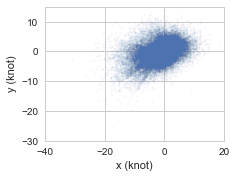

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAErVJREFUeJzt3XlQU9fbB/BvSEARRGmt1LFiBUoZdtz9UcWtYotUqUoV
UavVKlPHbbSgEjewldrqWEcrbmOL03EF29EqgoM6FdFCKeNCrUHBFQEBJYIsyfP+weutkRByITYk
PJ8ZZszJubnPAb859yY3JxIiIjDG9GZh7AIYMzUcGsZE4tAwJhKHhjGRODSMicShYUwkswpNbW0t
1q5diwEDBmDAgAH45ptvoFKpDNYfAJRKJYKDg1FeXt5on5UrV+Ldd9/V+Fm7dm2j/W/cuIEpU6bA
x8cHQUFBOHfuXNODbcJnn33WoIbdu3c32j8zMxMhISHw9vbG+PHjcfnyZeG+U6dOYdmyZaL2X1dX
h2+//RbvvfcefH19MWvWLNy8eVOjT2JiIgIDA+Hn54eJEyfi0qVLGvf//vvv+Oijj+Dt7Y2xY8fi
4sWLomp4ZciMrF+/nt5//33Kzs6m8+fPk7+/P23dutVg/YmIYmJiaPv27Tr7TJo0ibZt20ZFRUXC
T0VFhda+VVVVNGTIEJLL5aRQKGjr1q3k5eVF+fn5TQ9Yh8GDB1NSUpJGDZWVlVr7FhYWkp+fH23e
vJkUCgWtXr2aBgwYQI8fPxb6jB8/ni5evKj3/jdt2kQBAQF04cIFunnzJi1atIiGDx9OtbW1RESU
np5OXl5edOzYMSooKKANGzaQr68vFRYWEhFRbm4ueXh40NatWyk/P582bNhAvXv3pocPH7bgt2IY
ZhOaZ8+ekY+PD6WmpgptiYmJNGjQIFKpVC3uT0RUVFREvr6+VF5errOW/v3709mzZ/WqOykpiQYN
GkQ1NTVCW3h4OK1fv16v7bWpqKggV1dXUigUevXfsmULjRs3TritVqtpxIgRlJCQoFFneHi43jV8
9913dOrUKeF2bm4uubq60u3bt4mo/sln5syZGvv09PSkkydPEhHRokWLaO7cuRr3h4SEUEpKit41
vCpmc3iWm5uLqqoq9O/fX2jr27cvHj16hNu3b7e4PwAcOHAAfn5+6NSpU6N1FBcXo7y8HL169dKr
7j///BN+fn6wtLQU2vr164fs7Gy9ttdGoVBAJpPB0dFRr/7Z2dno16+fcFsikaBPnz4aNQwbNgzZ
2dm4fv26Xo+5ePFivP/++wCAx48f46effsLbb7+Nbt26AQDs7e2Rk5ODq1evgoiQmJgIIoKrqysA
4MKFC/jggw80akpMTMTIkSP12v+rZDahefjwIaytrdGxY0eh7Y033gAAFBYWtrg/AJw5cwaDBw/W
WYdCoYBEIsHOnTsREBCADz/8EHv27IFardbav6ioCF27dtVo69KlCx4+fKhzP03VYGtri6ioKLz3
3nsYO3YskpKSGu2vTw2dOnWCl5cXzp49K6qWXbt2oX///jh27BjWrFkDmUwGAJg2bRq8vLzw8ccf
w8PDA9HR0YiLi0OvXr1QUVGB0tJSWFpaYt68efjf//6HyZMnt+iJxJDMJjRVVVVo166dRpuVlRUA
oKampsX9VSoVrl27BhcXF5113Lx5ExYWFnB0dMSOHTswc+ZMbN26Fbt27RJVt7Ya9JWXl4dnz55h
0KBB2LVrF8aNGwe5XI7jx4+3qAYXFxdcuXJFVC2BgYFITExESEgIIiIikJeXB6A+qBUVFVi7di0O
HTqE6dOnY+XKlbhx4waePn0KAIiNjRXG4OXlhU8//RR3794Vtf9XQWbsAgylffv2Df7Iz29bW1u3
uH95eTlUKhXs7e2FtlmzZiErK0u4ffz4cYSFhSEoKAidO3cGALz77rt4/Pgx9u7di88//1zvOtq3
b691nEFBQbh//75wW9uz75IlSzB37lzhMNLNzQ137txBQkICgoKCml1D586dG7wC1pQePXoAAFav
Xo2srCwcPnwYkZGRWLVqFfz9/fHJJ58AADw8PHDt2jXs3r0bS5YsAQCMGTMGU6ZMAQC4u7sjIyMD
hw4dwqJFi0TVYGhmE5o333wTlZWVUCqVsLW1BVB/fgEADg4OLe4vkUgAQOMwa926dXj27Jlwu2vX
rpBIJEJgnnNxcUFJSQlUKhWkUqnGfQ4ODsJ+nysuLtZaAwDs2LEDdXV1Wu97TiqVNjjvcnZ2xpkz
Z7T217cGlUoFC4umD07UajXS0tLg6ekpPIZEIoGzszPKysoAAJcvX0Z4eLjGdp6ensjJyUHnzp1h
aWnZYFZ3cnLSeMIwFrM5PHNzc4O1tbXGM39mZia6dOmi9YRYbH97e3vIZDLhjw7U/2fr2bOn8COT
ybBu3TrMmDFDY9srV67g7bffbhAYAPDz80N2drZGEDIzM+Hn56d1nN27d9fYpzbz5s3DihUrNNqu
Xr0KJycnrf39/PyQmZkp3CYi4QWKF5WVlQnnfbpYWFhg7dq1SExMFNpUKhVyc3OFIDg4OEChUGhs
p1Ao4OjoCJlMBh8fH1y9elXj/ry8PGHmMiojv3pnUDExMTR8+HDKzMyk9PR08vf313hPpaysjMrK
yvTu/7IJEyZQfHy8zhoyMjLIzc2N4uPjqaCggJKSksjX15d++eUXIiKqq6ujoqIiqqqqIiIipVJJ
/v7+FBUVRQqFgrZt20be3t7CS7PNkZSURO7u7nT48GEqKCigvXv3koeHB/3xxx9ERFRdXU1FRUVU
XV1NREQPHjwgHx8f+u6770ihUNCaNWto4MCB9OTJE43HDQkJoT179hBR/ftLRUVFVFdXp7WGnTt3
Uu/evSklJYUUCgVFRUWRv7+/8Jh79+4lX19f4X2a+Ph4cnd3p9zcXCIiSktLIw8PD9q/fz/l5+dT
XFwc+fj40J07d5r9ezEUCZHxPoT24rO8IdTU1ODHH39ERkYGLC0tMWTIEEyaNEk4pIiJiQEAyOVy
vfq/LDExETdu3EBkZKTOOi5duoTExEQ8ePAA9vb2CA4OxogRIwDUH/YsWLAAc+bMQUBAAAAgPz8f
e/bsQUFBARwcHBAeHg5vb+8W/S5SU1Nx4sQJlJSUwMHBARMnThReVr527RpiY2MRHR0Nd3d3APWz
4U8//YSHDx/C0dERM2bM0JiZKisrMWfOHHzzzTfo1q0bzp49i/j4eGzevFnr7KNWq3Hs2DGcPn0a
5eXlcHV1xfTp0/HWW28BqJ/NkpOTkZKSgtLSUnTv3h2TJ0+Gh4eH8Bjp6ek4cuQISkpK0KNHD4SH
h8PNza1Fvxcx+vTpo/0OYyY2MzPTmLsXrbCwkHx8fKi4uFhnP1Mblz7i4uJo2rRpGm2zZ89u8nfR
mun6O+m6z2zOaf4LDg4OCAkJwYEDB4xdyn+KiJCamoqIiAih7c8//4SFhQW6dOlixMqMg0Mj0uLF
i/Hbb7/pvGDT3Jw8eRI9evTAwIEDhTZvb2/88MMPRqzKeMzmJef/SseOHRt9k9BcffDBBw2uGHj+
zn5bxDMNYyJxaBgTiUPDmEgcGsZE4tAwJhKHhjGRODSMicShYUwkDg1jInFoGBOpyWshVCoVoqOj
cevWLUgkEqxZswbt2rVDVFQUJBIJ3nnnHaxatQoWFhY4ePAg9u/fD5lMhoiICAwbNuy/GANj/6km
Q5OWlgYA2L9/Py5evIhNmzaBiLBw4UIMGDAAK1euxOnTp+Hr64uEhAQcOXIE1dXVCAsLg7+/v7BY
BWPmosnQjBw5EkOHDgUA3L9/H3Z2dkhPTxfWCxsyZAjOnz8PCwsL+Pn5wcrKClZWVnB0dMTff//d
5IepDP1BtNbCHMfFY6qn16WqMpkMkZGRSElJwffff4/z588LC03Y2NigoqICSqVSYw0xGxsbKJXK
Jh+70U/HmbC

Wall time: 7.76 s


## 2.3 Overview by Month

In [41]:
%%time
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        title = 'Month: %s' % (month)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4HOX1tu/tXavVrla9WJYsW3K3sbExAUyxqaYGEiDU
AD9CS0IoIcYJJUBChy8JJEACAUII1YRAAIdiMBjb4Car97JF0u5qe53vD7GLhWVLtkayBHquS5et
nZl3ZkfzzDnvec95jkQQBIFJTGISEwLSg30Bk5jEJIaPScJOYhITCJOEncQkJhAmCTuJSUwgTBJ2
EpOYQJgk7CQmMYEwSdjvACZX7r49mCTsGGD58uWUl5dz9913D7q9o6OD8vJyysvL6e3tFfXc7777
LmvWrEn9/sgjjzBv3jxRz+Hz+TjqqKN46623RB13EntikrBjBIlEwjvvvDPotrfffnvUzvu3v/0N
u90+auP7fD6uvPJKOjs7R+0ck/gak4QdI8ybN4/29naqqqr22PbWW29RXl5+EK5qZNi4cSNnnXUW
1dXVB/tSvjOYJOwYYcaMGRQUFOxhTTs7O9m+fTsrV67c45h33nmHM844g7lz53LEEUfw4IMPEovF
UtuXL1/On//8Z9asWcOiRYuYP38+N954Iz6fD4Dzzz+fjRs38v7771NeXk57e3vq2DfffJMVK1Yw
a9YsTj/9dLZs2ZLa1t7eTnl5OY888sg+v9NPfvITpk2bxl/+8pcDuieT2H9MEnYMcdxxx+3hFr/9
9tvMmTOH7OzsAZ+/8MILXHXVVcyePZtHH32U8847jyeffJKbbrppwH6PPfYYfX193H///Vx33XX8
+9//5o9//CMAa9asoaKigvnz5/PCCy9gtVoBCAaDPPDAA1xzzTU89NBDBINBrr766tTLwGq18sIL
L3DWWWft8/s8++yzPPTQQ2RkZIzovkxi+JAf7Av4LmHlypU88cQTNDQ0MHXqVKDfHT7++OMH7BeP
x3nwwQc58cQTUwGjZcuWYTAYWLNmDZdeeinTp08HIDs7m/vvvx+JRMKyZcv44IMP+Mtf/sKiRYs4
4ogj0Ov1aLVafvazn/H0008D/VHj3//+98ydOxeAWCzG1VdfTX19PdOnT0epVKa27QvTpk0T7d5M
YniYtLBjiFmzZpGTk8N///tfALq6uti2bRsrVqwYsF9jYyO9vb17uMknnngiAJs2bRowpkQiSf2e
mZkJ9FtXr9c76HXIZDJmz56d+j0vLw9gr/tPYvxgkrBjCIlEMsAtfvvtt5k9ezY5OTkD9vN4PACY
zeYBnxsMBpRKZWqOCqDRaPY4h0wmY9myZdx1112DXodKpUIq/fpPn/x/IpE4wG82ibHCJGHHGMcd
dxw7d+6kvb2dt99+ew93GCA9PR2Anp6eAZ/39fURiURS2/eFm266iQ0bNuB2u8W58EmMC0wSdowx
f/58MjMz+cc//sHWrVv3cIcBpkyZgslk2iMR4c0330yNMRT0ej233347zc3NAyLLk5jYmAw6jTGk
UinHHnssf/3rX1Nz2m9CJpNx1VVXcfvtt2M0Gjn66KOpqanhkUceYeXKlcMO9ixbtozMzEy++OIL
NBoN4XB4WMdFIhGqqqrIzs7eI3o9iYOLSQt7EHDccccRjUYHXXtN4rzzzuPOO+/ks88+44orruDZ
Z5/loosu4t57792vc912220Eg0G6u7upr68f1jEOh4Ozzz6bF198cb/ONYnRh2RS0+nbhfb2dn70
ox+xbt261Gfr16/nkksu4b333iM/P/8gXt0kRopJwk5iEhMIky7xJCYxgTBJ2ElMYgJhkrCTmMQE
wiRhvwVIJBJEo1EikQiRSIRwOEwoFCIUChEOh4lEIkSjUWKx2LhRn/D5fJx88smpCqLa2lq+//3v
s3LlSq655hoCgcAex3R3d3PFFVdw0kkncfbZZ/PFF1+M9WUfdEwGncYxBEFIETEajaZ+vknC/U0p
lMlkKBQKFAoFSqUSpVKZ+l2hUKBSqZDLR2+J/osvvuDWW2+lqamJt956i/z8fFatWsUtt9zCokWL
eOihh4jFYvz85z8fcNz1119Pfn4+1113HW1tbVx00UW88cYbqNXqUbvW8YbJxIlxAkEQiEQiBAIB
/H4/fr+fQCBAIpFAKpWmfuRyOXK5HI1Gg9FoRKVSpUiXJJlUKiUej/Pll18yd+5cJBIJgiAQi8VS
FjhJ+uQ5k8RPJBIIgoBCoUCr1aaqfbRarWgk/uc//8maNWu44YYbgP4iCK/Xy6JFiwA466yzOP/8
8/cg7K5du7j88ssBKCgoID09nS+++IIlS5aIcl0TAZOEPUiIxWJ4vd49yCmXy1EoFGg0GsxmM0aj
EYVCMaJzJZP7ZTIZKpUKg8Gw130FQSAYDOLxePD7/XR3dxONRkkkEgNIrNPp0Ov1AyqFhotvFiXY
7XaysrJSv1ut1kFlbSoqKnjjjTe47rrrqKuro76+nu7u7v0+/0TGJGHHEOFwGLfbjcvlwu/3p1xT
rVZLZmYmRqMRmUx2UK9RIpGkLOruiEQiuFwu+vr6cDqddHZ2IpFIMBqNpKenj+jaB3PpB3sR3Hzz
zdx+++2ccsopzJkzh8WLF4/4ZTbRMEnYUYQgCAQCAVwuF263m3A4jEKhQK/Xk5eXt09LN96gVCrJ
yspKWcJEIkFvby89PT20trYSj8fR6XRkZGSkXPXhIjs7G6fTmfrd6XQOmsMcCAS4/fbb0ev1AJx8
8skUFhaO8JtNLEwSVmQIgpByJd1uN4lEApVKRXp6OllZWd8aiyCVSrFYLFgsFgD8fj8OhwObzUZb
WxsqlQqTyURmZiZKpXKfY+Xm5qLRaNi4cSOLFi3ipZde4ogjjthjv7///e+YTCYuv/xy1q9fTzQa
TSlvfFcwSViREI/Hcblc2O12wuEwKpWK7OxsrFbrgGLxbyt0Oh1TpkwB+l1/u91OT08PNpsNo9GI
1WrFYDDsdc573333sXr1arxeL/n5+dx3330APP/88zgcDq699louv/xyfv7zn7N27Vr0ej2PPvro
d+Le7o7JZZ0RIhQK4XA46O7uRiqVkp6eTl5e3kG3pLtHiQ/mvNjn89HR0YHf70cul5OVlYXZbB7V
ZaNvMybv2gFAEATcbjd2ux2/349araaoqIiMjIwDipp+m6HX6ykvLycej9PV1YXNZqOjo4OMjAys
Vusewa1J7BuTFnY/IAgCvb29dHR0EI/H0ev1FBQUjMuF+/FiYQeDy+Wis7OTUCiEXq8nPz8fnU53
sC9rQmDSwg4DgiDQ19dHW1sb0WgUk8lEQUHBuCPCRIHJZMJkMhEMBmlpaaG6ujo1lRiPL7/xhEnC
DgGfz0dbWxvBYJD09HSKioomiSoSNBoN06dPJxgM0tTUxM6dOzGbzeTm5g4ZWf6uYpKwe0EwGKS9
vR2v14vBYGDWrFkHPZD0bYVGo6GiogKfz0dzczM7duzAarWSnZ09GZz6BibvxjcQi8Voa2ujt7cX
rVbLjBkz9tD+ncToQK/XM3PmTHp7e2lvb8fpdJKTk0NWVtZkMO8rTBJ2N7hcLlpaWpBKpZSVlZGW
lnawL+k7iYyMDDIyMujs7KSrq4ve3l5KSkom57dMEhbot6otLS14PB4yMzPJy8v7zi3Ij0fk5uZi
tVqpr6+nqqqK3Nzc77y1/c4T1uVy0dzcjEKhmHR/RcRrr73G448/DsD3vvc9brzxxgHb29vbU60x
DQYD99xzT6rHz+6Qy+VMnz6d7u7u1FTlu2xtv7NmJBaL0dDQQFNTE1arlcrKykmyioRgMMidd97J
008/zWuvvcamTZv45JNPBuzz0EMPccIJJ/Daa6+xYsUKHnjggX2OabFYmD17NjKZjKqqKmw227hR
zxhLjBvCJps

Wall time: 18.3 s


# 3. Create input data and configuration

In [42]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [43]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


In [44]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7
Wall time: 2min 53s


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.7 625
[  7.98933468e-05   9.55199089e-05   1.40297335e-04   2.87594924e-04
   6.03173512e-04]


In [48]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUI+V9NviUpJLULalvUt9bPd3qGQwePDBgG2wM+cBm
IT72mQTGJMwZZs0l653jmPXsZ8fgPYA3QBwf25AcB4jNJPk2Q7wTEjZ2ciDOibET57CsYzPB2Jjx
YfoqtVr3bt2vVbV/tN+aV6UqqapU6paaes7hMN2tqvdVqerR7/r8GEEQBJgwYcLEHoVltzdgwoQJ
E52ESXImTJjY0zBJzoQJE3saJsmZMGFiT8MkORMmTOxpmCRnwoSJPQ2T5EyYMLGnYZKcCRMm9jRM
kjNhwsSehklyJkyY2NMwSc6ECRN7GibJmTBhYk/DJDkTJkzsaZgkZ8KEiT0Nk+RMmDCxp2GSnAkT
JvY0TJIzYcLEnoZJciZMmNjTMEnOhAkTexomyZkwYWJPwyQ5EyZM7GmYJGfChIk9DZPkTJgwsadh
kpwJEyb2NEySM2HCxJ6Gbbc3YGL3IQgCKpUKarUarFYrWJaFxWIBwzC7vTUTJtoGIwiCsNubMLF7
KJfLSKfT8Hg8qFarAIBwOIzh4WF4PB5YLBaT9Ez0NExL7h0MjuNQLBYRj8fhcrlQq9XAsiwEQYAg
COA4DrVaDZVKBQzDwGq1mqRnoudgktw7EIIgoFargeM4MAwDjuOwuLgIjuNgs9nA8zwKhQIcDgds
tou3CCG9crkMi8UCq9UKq9UKm81mkp6JroXprr7DwPM8qtUqyMe+sbGBVCqF2dlZ2O12VCoVRCIR
MAyDarUKm82G/v5+9PX1ob+/H1arte585DwMw4hkZ7PZGl5nwsRuwbTk3iEg7ifHcQCAWq2GUCgE
nufBsiw8Hg8qlQqcTidYlsXg4CBcLhfK5TIKhQLS6TSi0ahIeoT4aDKr1WoQBAHlctkkPRNdA5Pk
3gHgeR61Wg08z4NhGGSzWayvr2NkZAQDAwNYW1urez3DMBAEAQzDwOl0wul0YmRkBIIgoFQqoVgs
YmtrC5FIBCzLioTXjPQslu1qpWq1ioGBAZP0TOwYTJLb4yBxNJJMiEQiyGQy8Pv9oqWmNmLBMIxI
ZjTpFQoFbG1tYWNjA3a7vc69JeQmCAKKxSJisZiYwCD/Ny09E52ESXJ7FFL3tFKpIBgMwm63Y2Fh
QUwotJMsoEkP2LYYiaW3ubmJjY0NOBwOkfDIMcRSlFp6JumZ6ARMktuDkLqnm5ubiEQiGBsbw8jI
SAOxSS05QkJaYbFYxHid1+sVSa9QKCCVSqFUKgEAEomESI60pWeSnolOwCS5PQbaPeV5HhsbGygW
i5ifn4fT6Wx4fSfLPmjSA4B8Po9YLAYASCaTKJfLcDqdoqXndDpN0jNhOEyS2yMQBAHRaBT9/f1w
OBwolUoIBoNwuVxYWFgQyUPpWKCzhAdsk57FYoHP5wOwbXEWi0UUCgUkEgmR9EhMTy3p2e12s0bP
hCJMktsDILVvm5ubsNlsyGaziMfjmJqawuDgYNNj5chBr7vaCtK1LBYLXC4XXC4XgIsdGKQLo1Kp
iG4tsfTIOaSkV6lUwHEchoeHwbKsSXomRJgk1+MgnQsExB1cWFiA3W5XdY5uqQe3Wq1wu91wu90A
LpJeoVBALBZDtVptsPQImZGER19fH0qlUl1Hhkl672yYJNejkLZm5XI5FItFeDwe+P1+1Q+10uu6
gfiakV40GkWtVhNJjxC91NKrVqsm6b3DYZJcD4JOLgBANBrF5uYmnE4nhoaG2n6Au5UApKRXq9VE
0svlcmLJDLH0HA6HSXomTJLrJUhr36rVKkKhEBiGwcLCAsLhsOZzdir+thOw2WzweDzweDxwOBwo
Fotwu91icTLHcWI8r7+/vy5BQZMeSWQQ4jNJb2/BJLkegbT2LZPJYH19HT6fDz6fr67I1gj0IvFZ
LBaR9IBtS69QKIhtaLSVJyU9nufFBA5NejabDTabzSS9HoZJcj0AjuNEQUtBELCxsYFsNot9+/aJ
NWiAPquM7lOlf9drkHvfNpsNAwMDGBgYALBt+RL3dmtrCzzP11l6tAVHk161WkU2m8X4+LhJej0I
k+S6GNLkAql9czqd2L9/v1kQK0Er4mFZFizL1pEesfRSqRQEQaiz9AjpEYuQuLcMw5iWXg/BJLku
Be2eAkAqlUI0GsX4+DiGh4cNq28j58lkMkin0+jr6xOb+fc6iKTU4OAgBEGos/RSqRQAoK+vTxQS
pS1e2tIzSa+7YZJcF2JzcxNWqxUOhwM8zyMcDqNUKim2ZhHoITlCohsbGxgcHEQul0M+n4fFYkG1
WhVdub1uNTIMA7vdDrvdXkd6hUIB2WwW5XIZy8vLspYeYJJeN8MkuS4CcU8TiQQGBgbAcRyCwSA8
Hk/L1iw9IMokABAIBESCJAXFLMsik8kgGo2CZVnx4ZbqxnUDjLY8adJjWRapVArj4+MoFArI5/NI
JBKwWCx110SJ9ADUzcewWq0m6e0gTJLrEtC1byR7ms/nVbVmEWix5Eh2dnR0FMViEVarFbVaDQDE
eQ3Dw8MYHh6u042jJZSIlUf3mO4mOkUcgiCIPbJ2ux1DQ0PiGEdSo0d08uhEBm3BmaS3ezBJbpch
rX3jOE50F7W0ZgHqSI7neUSjUWQyGTE7G4vFmh5H68ZJJZSkjfXSHtO9CoZh4HA44HA4xC8CQnrZ
bFYkPVoqXon04vE4hoaG4HK5RIWVvX79dhImye0ilGTJbTYbhoaGNBGcGhD31GaztZWdlUookele
RPmX7jElqii9/NBKS2zkIEd65XIZxWJRdPltNlude0tIr1QqiZnbSqUCAA3zMXr5+u02TJLbJUhb
syKRCLa2tjAzM4NMJqPrpm5myaXTaYTDYYyOjsLr9TbUxZEHmf6/WlgsloYe00KhgEKhgEgkglqt
JgbqpVnKXoCeeB89H4MmPbmhQHQWnVwXYt1LZ96apKcdJsntMKS1b9Vqtc66IlJJeh8s6XE8zyMS
icgWD3cKVqtVtvMgm82iWq1iaWlJtPII+bWLThOnEf3ASkOBOI4T52NIkzsm6bUPk+R2EFL3VMm6
aqc9iz6uXC6Lcx1auaedrIsjnQcOhwPVahXT09OipZdIJMAwTB3p0QOtuwGdIFA6zpnJZDAxMQFB
EBSHApmkpx/ddTftYdC6b4IgIBwOI5/PY25uThwEQ6CX5OjjCIEqzXWQHif9mbhPnYC0CFeapaRj
V++EGj06e6t2KBCZj2GSXmuYJNdhKLVm9fX1YWFhQfYBbofkOI5DOBxGNpuVJdBm+9yNB0EpYE/H
rshsV/rhltt/p9DpayN3fjVDgUgZDz0UiCa9Wq2GSqWCcDiM6elpsCz7jiQ9k+Q6CLqxHtge3hKL
xTAxMYHh4WHF4/RaUhzHYWtrCy6XS1P2tJtueKXYldzDLa3R66b3oQVqSFQuo02uS6uhQCTuR6xm
2tJjWbaOHPciTJLrAEjt25tvvon9+/cDAMLhMCqVCgKBABwOR9Pj9Vhy6XQayWQS/f39mpSB6T0b
ERM0GnI1emQOBKnRI/22LMt2xOraDUuuFeRIT24oUF9fX0PmFqi39PY66ZkkZzCkjfX5fB6RSAQD
AwOYmZlR1RmghWRI9jSXy4kkoPUG7aUbWmn4TTKZRD6fx+LioqJQ5l6G9LrQpAcAS0tLTQu25UjP
arWK9Xq9fA1NkjMQ0to30lw/PT0tyvuohRqSo7OnCwsLSKfTKBaLuvYuXa9bLLlWIJLopVIJDMNg
cHCwTjOOCGXKacapRTdacq1ASK+vrw9bW1sIBAKiBRyLxZpOQgMu3stSqfheJD2T5AwAcU9rtZqo
PxYKhSAIAmZ

In [49]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [50]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [51]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.407  -1.448  -1.310  2.694  2.264   0.110
2  0.367   2.290   2.271  3.100  2.186  -0.115
3  0.225  -7.448  -1.822  4.122  4.105   0.220

GMM Plot Result
0.407467668198 [[-1.44774596 -1.31003135]] [ 2.22074785  2.72988028] -73.884132745
0.367328722158 [[ 2.29008732  2.27056826]] [ 2.15745463  3.11945665] -98.9661977036
0.225203609645 [[-7.44788254 -1.82241331]] [ 3.63387092  4.54307318] -45.529075851


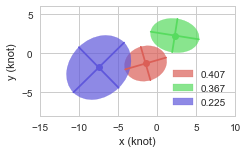

In [52]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [53]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLNV9Jvpl1t7V1fu+L5eL0QJiveLJlsY8I2zGtp7M
G2vxeyGHNBMhh0eElnjWghB6QtdCtnzxIg+2GMtycMFcBTM24kkxHmszsjQIECAsQMDttapr79r3
qsx8fzTn9KnszKrcqrqqb34RHfd2V508WVWZX/3W78dJkiTBhg0bNk4o+OM+ARs2bNjoJGySs2HD
xomGTXI2bNg40bBJzoYNGycaNsnZsGHjRMMmORs2bJxo2CRnw4aNEw2b5GzYsHGiYZOcDRs2TjRs
krNhw8aJhk1yNmzYONGwSc6GDRsnGjbJ2bBh40TDJjkbNmycaNgkZ8OGjRMNm+Rs2LBxomGTnA0b
Nk40bJKzYcPGiYZNcjZs2DjRsEnOhg0bJxo2ydmwYeNEwyY5GzZsnGjYJGfDho0TDZvkbNiwcaJh
k5wNGzZONJzHfQI2jh+SJKFWq6HRaMDhcMDlcoHneXAcd9ynZsOGaXCSJEnHfRI2jg/VahXZbBaB
QAD1eh0AEA6HMTo6ikAgAJ7nbdKz0dewLblLGIIgoFwuI5FIwO/3o9FowOVyQZIkSJIEQRDQaDRQ
q9XAcRwcDodNejb6DjbJXYKQJAmNRgOCIIDjOAiCgI2NDQiCAKfTCVEUUSqV4PF44HQeXiKE9KrV
Knieh8PhgMPhgNPptEnPRs/CdlcvMYiiiHq9DvKxRyIRpFIpLC0twe12o1arIRqNguM41Ot1OJ1O
DAwMwOfzYWBgAA6Ho+l45Dgcx1GyczqdR55nw8ZxwbbkLhEQ91MQBABAo9FAKBSCKIpwuVwIBAKo
1Wrwer1wuVwYHh6G3+9HtVpFqVRCNptFLBajpEeIjyWzRqMBSZJQrVZt0rPRM7BJ7hKAKIpoNBoQ
RREcxyGfz2Nvbw9jY2MYGhrC7u5u0/M5joMkSeA4Dl6vF16vF2NjY5AkCZVKBeVyGZlMBtFoFC6X
ixJeK9Lj+YNqpXq9jqGhIZv0bHQNNsmdcJA4GkkmRKNR5HI5LC4uUktNa8SC4zhKZizplUolZDIZ
RCIRuN3uJveWkJskSSiXy4jH4zSBQf61LT0bnYRNcicUcve0VqshGAzC7XZjfX2dJhTMJAtY0gMO
LEZi6aXTaUQiEXg8Hkp4ZA2xFOWWnk16NjoBm+ROIOTuaTqdRjQaxdTUFMbGxo4Qm9ySIySkFzzP
03jd+Pg4Jb1SqYRUKoVKpQIASCaTlBxZS88mPRudgE1yJwyseyqKIiKRCMrlMlZXV+H1eo88v5Nl
HyzpAUCxWEQ8HgcA7O/vo1qtwuv1UkvP6/XapGfDctgkd0IgSRJisRgGBgbg8XhQqVQQDAbh9/ux
vr5OyUNtLdBZwgMOSI/neUxMTAA4sDjL5TJKpRKSySQlPRLT00p6brfbrtGzoQqb5E4ASO1bOp2G
0+lEPp9HIpHA3NwchoeHW65VIgej7mo7yPfieR5+vx9+vx/AYQcG6cKo1WrUrSWWHjmGnPRqtRoE
QcDo6ChcLpdNejYobJLrc5DOBQLiDq6vr8Ptdms6Rq/UgzscDgwODmJwcBDAIemVSiXE43HU6/Uj
lh4hM5Lw8Pl8qFQqTR0ZNuld2rBJrk8hb80qFAool8sIBAJYXFzUfFOrPa8XiK8V6cViMTQaDUp6
hOjlll69XrdJ7xKHTXJ9CDa5AACxWAzpdBperxcjIyOmb+BeJQA56TUaDUp6hUKBlswQS8/j8dik
Z8MmuX6CvPatXq8jFAqB4zisr68jHA7rPman4m/dgNPpRCAQQCAQgMfjQblcxuDgIC1OFgSBxvMG
BgaaEhQs6ZFEBiE+m/ROFmyS6xPIa99yuRz29vYwMTGBiYmJpiJbK9CPxMfzPCU94MDSK5VKtA2N
tfLkpCeKIk3gsKTndDrhdDpt0utj2CTXBxAEgQpaSpKESCSCfD6P5eVlWoMGGLPK2D5V9m/9BqXX
7XQ6MTQ0hKGhIQAHli9xbzOZDERRbLL0WAuOJb16vY58Po/p6Wmb9PoQNsn1MOTJBVL75vV6cerU
KbsgVoZ2xONyueByuZpIj1h6qVQKkiQ1WXqE9IhFSNxbjuNsS6+PYJNcj4J1TwEglUohFothenoa
o6OjltW3sTEqM8fpRxBJqeHhYUiS1GTppVIpAIDP56NCoqzFy1p6Nun1NmyS60Gk02k4HA54PB6I
oohwOIxKpaLamkVwqZBTJ8BxHNxuN9xudxPplUol5PN5VKtVbG1tKVp6gE16vQyb5HoIxD1NJpMY
GhqCIAgIBoMIBAJtW7PMgOM4eoOycuf9BKvJnSU9l8uFVCqF6elplEolFItFJJNJ8DxPCc/n86mS
HoCm+RgOh8MmvS6iP6/oEwi29o1kT4vFoqbWLAKjlpwkSdje3m7KKrrdbtTrdbhcLt3HOy50ijgk
SaLvidvtxsjICB3jSGr0iE4em8hgLTib9I4PNskdM+S1b4IgoFgsgud5Xa1ZgDGSy+VyAIBAIICF
hQXU63XE43HUajXs7OzA4XDQm1ZpxsOlCo7j4PF44PF4MDo62kR6+Xyekh4rFa9GeolEAiMjI/D7
/VRhxSY962CT3DFCTZbc6XRiZGREF8HpBVEtyWaz4DgO4+PjEAQBbreb9oSOjY2hWq2iXC4jl8sh
Fou1lDs/qZCX2ChBifTk753T6WxybwnpVSoVmrmt1WoAcGQ+hk16xmGT3DFB3poVjUaRyWSwsLCA
XC5n6KLWaskRlWCn04n19XW8+uqr9EaW/0tmPJAbl4hgssq/xFphpZFOEoyEAJTeO7WhQGwWnXzu
xLqXz7y1SU8/bJLrMuS1b/V6nRLOqVOnqFSS0Rur3TqlTgk9xycWnFz5V64HJ5dGYl9/J6DF2jID
K/qB1YYCCYJA52Owlh5LZjbpGYdNcl2E3D3NZrMIh8OYnJzE+Pg4vVDNlIKorWPdU3mnRKt1rSBX
/lVSCWED8f2KThAo+4WRy+UwMzMDSZJUhwLZpGccNsl1CazumyRJCIfDKBaLWFlZoYNgCIySnNo6
uXsqLxOR3xCkpEQvWqmEkN5RAMhkMkfqzC5lsNlbrUOByHwMm/Tawya5DkOtNcvn82F9fV0xcG+G
5OTkpNU97YS1wqqEAAczHqLRKCqVCu0oYLOPZspVOlkE3WlXWOn4WoYCkXgoOxSIJb1Go4FarYZw
OIz5+Xm4XK5LkvRskusg2MZ64GB4Szwex8zMDEZHR1XXGbWkWHJkZ6wquafydd0AucGIa0Y6CgqF
AhKJRNONTbKPetCvN64WEpWHBljSazcUiMT9SJkLa+m5XK4mcjyJsEmuAyC1by+88AJOnToFAAiH
w6jValhbW4PH42m53mx7Vjv3VO2crYgJagXbUSAvrmXLVeSB+OPAcVhy7aBEekpDgXw+35HMLdBs
6Z100rNJzmLIG+uJizY0NISFhQVNJRZm3NVqtYqNjY0jyYx2644bSnVml2K5ilHIhwKxpAcAm5ub
LTPfSqTncDhovV4vXCNGYZOchZDXvpHm+vn5eSrvoxV6SU6SJORyOZTLZaysrOjOZsr3O+5Gf73l
Kp20tnrRkmsHQno+nw+ZTAZra2t0EhrpaFGbhAYcXstyqfh+JD2b5CwAcU8bjQbVHwuFQpAkCUtL
SzTbqBV6LTninoqiiEAgoJvglLKrvYZW5SrxeBzVapW6WnLV315HNwhaz1AgdhKaPJFRrVbBcdyR
joxehk1yJqHWmjU2NoZGo2HoAtBzwZPs6eTkJHiep+7JSYf8po3FYhBFEbVarUnqXEn1Vy86TUJA
Z8UFlI6tRHp

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHptJREFUeJztnXtQVOf5x7/LrusFRGKJQCQgIjHqz0vUik2sRqKhOqWD
RUVUOqlOjNRLTIzijUsiSKyXzNRLMsGmrVojkXSqTjumqRptdLxAComIokTBCyCo1AUNK7vn9wc5
x93lXJfdPXuW5zPDDHuu7wE+PO/7nud9Xx3DMAwIgtAMfmoXgCAIZZC0BKExSFqC0BgkLUFoDJKW
IDQGSUsQGsOgdgEIQmtYrVZkZ2fj8uXLMBqNyMnJQWRkJLf/2LFj2LFjBwwGA5KSkjBz5kw8fvwY
a9aswa1bt2A2m5GWloZXXnkFVVVVWLVqFXQ6HWJiYpCVlQU/P4lYyhAEoYgvvviCSU9PZxiGYf77
3/8yCxcu5PaZzWZm0qRJTGNjI9PS0sL8+te/Zurr65nCwkImJyeHYRiGuX//PjNhwgSGYRjmjTfe
YM6cOcMwDMNkZGQw//rXvyTvT9VjglBIcXExfv7znwMARowYgQsXLnD7KisrERERgV69esFoNGLU
qFE4f/48fvGLX+DNN98EADAMA71eDwAoKyvDmDFjAADjx4/H6dOnJe+vyepxcXGx2kUgvJxRo0ZJ
HlNSchQWSxDvPqPRiKFDh/Lua2pqQkBAAPdZr9ejtbUVBoMBTU1N6NmzJ7fP398fTU1N8Pf3585d
unQpli1bBqBNYJ1Oxx1rMpkky61JaQGg4L3jso81mZrQs2eA9IEaxdefD1D2jMmZE2UdZ7EEoW/E
Bt59t6rXCJ4XEBCA5uZm7rPVaoXBYODd19zczElcU1ODRYsWYfbs2UhISAAAu/Zrc3MzAgMDJctN
1WOCUMjIkSNx8uRJAEBJSQmee+45bl90dDSqqqrQ2NgIs9mMoqIivPDCC2hoaMC8efOwYsUKTJ8+
nTt+8ODBOHv2LADg5MmTGD16tOT9NRtpCUItJk+ejFOnTmHWrFlgGAYbNmzA4cOH8fDhQyQnJ2PV
qlWYP38+GIZBUlISQkJCkJOTgwcPHmDnzp3YuXMnACA/Px/p6enIyMjA1q1b0b9/f8THx0veX8cw
2hvlU1xcTNVjG3z9+QDl1WM5bdri4mLR6rGca6gBVY8JQmOQtAShMUhagtAYJC1BaAxVpC0tLUVq
aioAoKqqCikpKZg9ezaysrJgtVrVKBJBaAaPS5ufn49169ahpaUFAJCXl4dly5Zh3759YBgGR48e
9XSRCEJTePw9bUREBLZt24aVK1cCaJ97eerUKUyePFnyOiZTk6L7Kj1ea/j68wGd4xnl4HFp4+Pj
cfPmTe6zM7mXABS9l/T195i+/nxA53hGuaieEeVM7iVBuIq7P1xRuwiKUV1aNvcyNjYWJ0+exNix
Y9UuEtGJuI6XebeHerYYilD9lU96ejq2bduG5ORkPH78WFbuJUF0ZlSJtOHh4fjss88AAFFRUdi7
d68axSAITaJ6pCUIQhkkLUFoDJKWIDQGSUsQGoOkJQiNQdIShMYgaQlCY5C0BKEQq9WKzMxMJCcn
IzU1FVVVVXb7jx07hqSkJCQnJ3P5CCy2w1IB4O7du0hLS8OcOXMwa9YsVFdXS95f9TRGgtAa//73
v2E2m1FQUICSkhK8//77+PDDDwEAjx8/Rl5eHgoLC9G9e3ekpKQgLi4OwcHByM/Px6FDh9C9e3fu
Wps2bUJCQgKmTp2KM2fO4Pvvv0dERITo/SnSEoRCnFkWBHgyLNWWb775BnV1dXjttddw+PBhbpiq
GCQt0ampeljN+yWG0LIg7D6+ZUGAtmGp7EoELLdu3UJgYCD+/Oc/IywsDPn5+ZJlpuox0an5n/VF
xec4uywIH0FBQYiLiwMAxMXF4YMPPpC8P0VaglCIM8uCCDFq1CicOHECAHD+/HkMGDBA8v4UaQlC
Ic4sCyJEeno61q1bh/379yMgIABbtmyRvD9JSxAK8fPzw3vvvWe3LTo6mvs+Li6Oq/I6YjssFQD6
9u2LP/3pT8rur+hogiBUh6QlCI1B1WONcrXhEfe9xQLoWx6JHN3GgODukscQ3g9JqxFsJWWJHtqW
OWMymURfKwBA5XfVvNcQggT3XkhaL8VRMFZQZ1FyvqPgJLB34TXSTps2jcsyCQ8PR15ensolUg9W
mI6K6iy297UVmOT1DrxC2paWFjAMgz179qhdFNVRW1hH2HKw8pK46uMV0l66dAmPHj3CvHnz0Nra
irfffhsjRowQPccX1/K5/RAIiw4GANnLowDANbMZuHuXd1+U0eiSsvXp9xRqKhtwua7t5/hMD5dc
VhFa+B16Aq+Qtlu3bpg/fz5mzJiB69ev4/XXX8eRI0faJVfb4mtr+VxteITnRsiPrmWNjdz3YeGB
gh1RlRW1ktcaEhQk6549R7Tdo/K7atS1LXroscjrrt/h5Qc1vNtf9Qoz+PGKokVFRSEyMhI6nQ5R
UVEICgpCfX09wsLC1C6aR5Dbq2sravRzTxauEIvKtsfxUVlRa3ddQFpiX6oyG6xD1S6CYrxC2sLC
QlRUVCA7Oxt1dXVoamrC008/rXaxPILcNiwrlpSEAPCtqYH7fljPYNFjHa9nK7Fcea9+1zaUTcvy
agmvkHb69OlYvXo1UlJSoNPpsGHDBtGqsa/hrLCsnBaLBXpTC7c9JqrPk2Ou3eG9ppDMtvco+7Fq
LUde6mX2HF5hhtFolDW6wdeQqhaLRVdW2JioPqLJFbYCs1y5dscuGgP8ErP3lSOvL1WZvR2vkLYz
IrdaLBRd+WQEgNKH9e22De9h39RwPNdWYiF52WqzkqhL4roHklYF5Ajr2DkE8Atb+rAeFrRC//AH
btvz4U8kvXSzvp3IQhKLyas06pK47oOk9TBKkidso6yQsAAQ0TtAsHpsKzB33s0nEtsKLFdeOVGX
xHUfJK0HUdJTLFfY58Of5l75lJr53zkCwHDjk9dntiLzCewoL4nrXZC0HsC2w0luT7EjQsKWmmtg
MVigN7dlCw0K5X9VVlprLzQrMSuwbTXaUV62B9pWXqXiEq6DpHUzzuQS80VZltKH9ZxobGTtF+iP
AIfqcTVzHQAQoesHwF7m8tp67lwheR2rzXxR17adK9VBRdHWdciaucJkMqGsrAzl5eWKcmI7K1cb
HnFf0UMjZAsrFWX5eob5IisrrOP3tuew5zlWqbl/CA73EuqtBtrkFSo74D2DH3wF0Uh74sQJ7Nq1
C1evXkVoaCgMBgNqamoQHR2NefPmYcKECZ4qp9fjqvGvYlEWQLso6wgr6ZDebTMAlt2rQzVznYu4
tgwKfRrlte3/ETwf/jQu3Wy/nS2TVJaVr2O1WpGdnY3Lly/DaDQiJycHkZGR3P5jx45hx44dMBgM
SEpKwsyZM7l9paWl2Lx5Mzeirby8HOvXr4der4fRaMTGjRsRHCz+8xWUdtWqVQgODkZmZiZiYmLs
9l25cgWFhYU4fPgwNm/e7NSD+wpK2qtiyGnLOuIYZR2FZb+XEre0tsauo4pFqJrc2XHlWj65ubnI
yMjAoEGDsH//fuTn52P16tWi9xeU9q233hKcrzUmJgarV69Gba30CBJfxNWzSnDXEckr5qsa28In
LAsrrhil5pp2Pcx87VvAuWgbPTQCV7+r9rp2reDPRSTFW+5aPgC4tXymTJnCreWzcuVK7vitW7ei
T5+2f8wWiwVdu3aVLLNgm5YVdv369e32paentz1XqHTyui/BtlMBcG1VVwjr+IpHCKGqcX23tujH
JyzLkN4hvO1bAJLtW1uEIr9Uu9ZbidD14/0Sw5Vr+bDCfvPNN9i7dy9ee+01yTILRtq1a9fixo0b
uHDhAq5cucJ

## Goodness-of-fit Statistics

In [54]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.019      0.087  3.305099e-07      0.030       0.369

# 6. GMM by Optimization

In [55]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [56]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.068684220363252
     jac: array([  2.18308663e+00,   0.00000000e+00,  -2.38418579e-07,
         4.76837158e-07,   4.76837158e-07,   4.76837158e-07,
         2.18307948e+00,   0.00000000e+00,   4.76837158e-07,
         7.15255737e-07,   2.38418579e-07,  -9.53674316e-07,
         2.18308878e+00,   4.76837158e-07,   2.38418579e-07,
         0.00000000e+00,   2.38418579e-07,  -7.15255737e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1143
     nit: 56
    njev: 56
  status: 0
 success: True
       x: array([ 0.78168748, -1.71179737, -0.70144784,  4.94121846,  3.31805869,
        0.34754223,  0.09258535, -0.25232479,  0.02825073,  0.9860894 ,
        1.94340485,  0.4406697 ,  0.12572718,  2.30762822,  2.72514708,
        2.2760475 ,  1.45660176, -0.38160257])

## 6.1 GMM Result

In [57]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.782  -1.712  -0.701  4.941  3.318   0.348
2  0.126   2.308   2.725  2.276  1.457  -0.382
3  0.093  -0.252   0.028  0.986  1.943   0.441

GMM Plot Result
0.781687475102 [[-1.71179737 -0.70144784]] [ 2.98578647  5.14880884] -69.8166423178
0.125727179869 [[ 2.30762822  2.72514708]] [ 1.29082672  2.37399395] -109.79927952
0.0925853450292 [[-0.25232479  0.02825073]] [ 0.85890179  2.00286855] 164.470824766


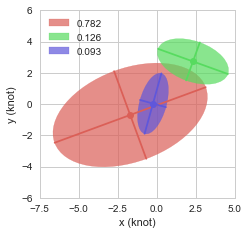

In [58]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [59]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.024      0.068  1.050653e-07      0.017       0.208

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWmQLGd5Lvhk7dW19L539emuPhJXYISRWAYk5GsNsrAu
DIscxiZirhljR4yvB4HBWBKSgAGO2YXvWIwGxCJfhEPCCjNYF8K+BgSKKwdC8rEYWwuX092nu6pr
6dr3LbNyfrTePF9lZ1ZlZmVVV7XyiTiho9P95fdVVeZT7/q8nCiKIixYsGDhlMJ20gewYMGChUHC
IjkLFiycalgkZ8GChVMNi+QsWLBwqmGRnAULFk41LJKzYMHCqYZFchYsWDjVsEjOggULpxoWyVmw
YOFUwyI5CxYsnGpYJGfBgoVTDYvkLFiwcKphkZwFCxZONSySs2DBwqmGRXIWLFg41bBIzoIFC6ca
FslZsGDhVMMiOQsWLJxqWCRnwYKFUw2L5CxYsHCqYZGcBQsWTjUskrNgwcKphkVyFixYONWwSM6C
BQunGhbJWbBg4VTDcdIHsHDyEEURzWYTPM/DbrfD6XTCZrOB47iTPpoFC32DE0VRPOlDWDg5NBoN
FAoFBAIBtFotAEAsFsP09DQCgQBsNptFehbGGpYl9yKGIAio1WpIpVLw+XzgeR5OpxOiKEIURQiC
AJ7n0Ww2wXEc7Ha7RXoWxg4Wyb0IIYoieJ6HIAjgOA6CIGB7exuCIMDhcKDdbqNarcLtdsPhuHSL
EOk1Gg3YbDbY7XbY7XY4HA6L9CyMLCx39UWGdruNVqsF+tjj8Tiy2SzW19fhcrnQbDaRSCTAcRxa
rRYcDgcmJibg9XoxMTEBu93ecT26DsdxEtk5HI5jv2fBwknBsuReJCD3UxAEAADP84hGo2i323A6
nQgEAmg2m/B4PHA6nZicnITP50Oj0UC1WkWhUEAymZRIj4iPJTOe5yGKIhqNhkV6FkYGFsm9CNBu
t8HzPNrtNjiOQ6lUwsHBAWZmZhAMBrG/v9/x+xzHQRRFcBwHj8cDj8eDmZkZiKKIer2OWq2GfD6P
RCIBp9MpEV430rPZjqqVWq0WgsGgRXoWhgaL5E45KI5GyYREIoFisYhQKCRZalojFhzHSWTGkl61
WkU+n0c8HofL5epwb4ncRFFErVbD4eGhlMCg/1qWnoVBwiK5Uwq5e9psNhGJROByubC1tSUlFPpJ
FrCkBxxZjGTp5XI5xONxuN1uifBoDVmKckvPIj0Lg4BFcqcQcvc0l8shkUhgYWEBMzMzx4hNbskR
CemFzWaT4nWzs7MS6VWrVWSzWdTrdQBAOp2WyJG19CzSszAIWCR3ysC6p+12G/F4HLVaDZubm/B4
PMd+f5BlHyzpAUClUsHh4SEAIJPJoNFowOPxSJaex+OxSM+C6bBI7pRAFEUkk0lMTEzA7XajXq8j
EonA5/Nha2tLIg+1tcBgCQ84Ij2bzYa5uTkARxZnrVZDtVpFOp2WSI9ielpJz+VyWTV6FlRhkdwp
ANW+5XI5OBwOlEolpFIprKysYHJysutaJXIw6q72gnwvm80Gn88Hn88H4FIHBnVhNJtNya0lS4+u
ISe9ZrMJQRAwPT0Np9NpkZ4FCRbJjTmoc4FA7uDW1hZcLpema4xKPbjdboff74ff7wdwifSq1SoO
Dw/RarWOWXpEZpTw8Hq9qNfrHR0ZFum9uGGR3JhC3ppVLpdRq9UQCAQQCoU0P9RqvzcKxNeN9JLJ
JHiel0iPiF5u6bVaLYv0XuSwSG4MwSYXACCZTCKXy8Hj8WBqaqrvB3hUCUBOejzPS6RXLpelkhmy
9Nxut0V6FiySGyfIa99arRai0Sg4jsPW1hZisZjuaw4q/jYMOBwOBAIBBAIBuN1u1Go1+P1+qThZ
EAQpnjcxMdGRoGBJjxIZRHwW6Z0uWCQ3JpDXvhWLRRwcHGBubg5zc3MdRbZmYByJz2azSaQHHFl6
1WpVakNjrTw56bXbbSmBw5Kew+GAw+GwSG+MYZHcGEAQBEnQUhRFxONxlEolnDlzRqpBA4xZZWyf
Kvtv4wal1+1wOBAMBhEMBgEcWb7k3ubzebTb7Q5Lj7XgWNJrtVoolUpYXFy0SG8MYZHcCEOeXKDa
N4/Hg7Nnz1oFsTL0Ih6n0wmn09lBemTpZbNZiKLYYekR6ZFFSO4tx3GWpTdGsEhuRMG6pwCQzWaR
TCaxuLiI6elp0+rb6DrFYhGFQgFer1dq5j/tIEmpyclJiKLYYells1kAgNfrlYREWYuXtfQs0htt
WCQ3gsjlcrDb7XC73Wi324jFYqjX66qtWQQjJEckGo/HMTk5iXK5jEqlApvNhlarJblyp91q5DgO
LpcLLperg/Sq1SpKpRIajQZ2d3cVLT3AIr1RhkVyIwRyT9PpNILBIARBQCQSQSAQ6NmaZQSkTAIA
4XBYIkgqKHY6nSgWi0gmk3A6ndLDLdeNGwWYbXmypOd0OpHNZrG4uIhqtYpKpYJ0Og2bzdbxnqiR
HoCO+Rh2u90ivSHCIrkRAVv7RtnTSqWiqTWLoMeSo+zs/Pw8arUa7HY7eJ4HAGlew/T0NKanpzt0
41gJJbLy2B7Tk8SgiEMURalH1uVyYWpqShrjSDV6pJPHJjJYC84ivZODRXInDHntmyAIkruopzUL
0EZy7XYbyWQSxWJRys4eHh52XcfqxskllOSN9fIe09MKjuPgdrvhdrulLwIivVKpJJEeKxWvRnqp
VApTU1Pw+XySwsppf/+GCYvkThBqsuQOhwNTU1O6CE4LyD11OBx9ZWflEko03YuUf9keU1JFGeeH
Vl5iowQl0ms0GqjVapLL73A4OtxbIr16vS5lbpvNJgAcm48xzu/fScMiuROCvDUrkUggn89jbW0N
xWLR0E3dzZIrFAqIxWKYn5/H7Ozssbo4epDZ/2qFzWY71mNarVZRrVaRSCTA87wUqJdnKccBRuJ9
7HwMlvSUhgKxWXR6X8i6l8+8tUhPPyySGzLktW+tVqvDuiKpJKMPlnxdu91GIpFQLB4eFOx2u2Ln
QalUQqvVws7OjmTlEfn1i0ETpxn9wGpDgQRBkOZjyJM7Fun1D4vkhgi5e6pmXfXTnsWuazQa0lyH
Xu7pIOviqPPA7Xaj1WphdXVVsvTS6TQ4jusgPXag9ShgEATKxjmLxSKWlpYgiqLqUCCL9IxjtO6m
UwxW900URcRiMVQqFWxsbEiDYAhGSY5dRwSqNtdBvk7+/+Q+DQLyIlx5lpKNXb0YavTY7K3WoUA0
H8Mivd6wSG7AUGvN8nq92NraUnyA+yE5QRAQi8VQKpUUCbTbOU/iQVAL2LOxK5rtyj7cSucfFAb9
3ihdX8tQICrjYYcCsaTH8zyazSZisRhWV1fhdDpflKRnkdwAwTbWA0fDWw4PD7G0tITp6WnVdUYt
KUEQkM/n4fP5dGVPR+mGV4tdKT3c8hq9UXodeqCFRJUy2vS+9BoKRHE/sppZS8/pdHaQ42mERXID
ANW+PfPMMzh79iwAIBaLodlsIhwOw+12d11vxJIrFArIZDKYmJjQpQzMntmMmKDZUKrRozkQVKNH
/bZOp3MgVtdJWHK9oER6SkOBvF7vscwt0GnpnXbSs0jOZMgb6yuVChKJBILBINbW1jR1BughGcqe
lstliQT03qDjdEOrDb/JZDKoVCrY3t5WFco8zZC/LyzpAcDOzk7Xgm0l0rPb7VK93ji/hxbJmQh5
7Rs116+urkryPlqhheTY7OnW1hYKhQJqtZqhs8v3GxVLrhdIEr1er4PjOExOTnZoxpFQppJmnFaM
oiXXC0R6Xq8X+Xwe4XBYsoAPDw+7TkIDLt3Lcqn4cSQ9i+RMALmnPM9L+mPRaBSiKGJ9fV0qktUK
LZYclRl0k17

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHptJREFUeJztnXtQVOf5x7/LrusFRGKJQCQgIjHqz0vUik2sRqKhOqWD
RUVUOqlOjNRLTIzijUsiSKyXzNRLMsGmrVojkXSqTjumqRptdLxAComIokTBCyCo1AUNK7vn9wc5
x93lXJfdPXuW5zPDDHuu7wE+PO/7nud9Xx3DMAwIgtAMfmoXgCAIZZC0BKExSFqC0BgkLUFoDJKW
IDQGSUsQGsOgdgEIQmtYrVZkZ2fj8uXLMBqNyMnJQWRkJLf/2LFj2LFjBwwGA5KSkjBz5kw8fvwY
a9aswa1bt2A2m5GWloZXXnkFVVVVWLVqFXQ6HWJiYpCVlQU/P4lYyhAEoYgvvviCSU9PZxiGYf77
3/8yCxcu5PaZzWZm0qRJTGNjI9PS0sL8+te/Zurr65nCwkImJyeHYRiGuX//PjNhwgSGYRjmjTfe
YM6cOcMwDMNkZGQw//rXvyTvT9VjglBIcXExfv7znwMARowYgQsXLnD7KisrERERgV69esFoNGLU
qFE4f/48fvGLX+DNN98EADAMA71eDwAoKyvDmDFjAADjx4/H6dOnJe+vyepxcXGx2kUgvJxRo0ZJ
HlNSchQWSxDvPqPRiKFDh/Lua2pqQkBAAPdZr9ejtbUVBoMBTU1N6NmzJ7fP398fTU1N8Pf3585d
unQpli1bBqBNYJ1Oxx1rMpkky61JaQGg4L3jso81mZrQs2eA9IEaxdefD1D2jMmZE2UdZ7EEoW/E
Bt59t6rXCJ4XEBCA5uZm7rPVaoXBYODd19zczElcU1ODRYsWYfbs2UhISAAAu/Zrc3MzAgMDJctN
1WOCUMjIkSNx8uRJAEBJSQmee+45bl90dDSqqqrQ2NgIs9mMoqIivPDCC2hoaMC8efOwYsUKTJ8+
nTt+8ODBOHv2LADg5MmTGD16tOT9NRtpCUItJk+ejFOnTmHWrFlgGAYbNmzA4cOH8fDhQyQnJ2PV
qlWYP38+GIZBUlISQkJCkJOTgwcPHmDnzp3YuXMnACA/Px/p6enIyMjA1q1b0b9/f8THx0veX8cw
2hvlU1xcTNVjG3z9+QDl1WM5bdri4mLR6rGca6gBVY8JQmOQtAShMUhagtAYJC1BaAxVpC0tLUVq
aioAoKqqCikpKZg9ezaysrJgtVrVKBJBaAaPS5ufn49169ahpaUFAJCXl4dly5Zh3759YBgGR48e
9XSRCEJTePw9bUREBLZt24aVK1cCaJ97eerUKUyePFnyOiZTk6L7Kj1ea/j68wGd4xnl4HFp4+Pj
cfPmTe6zM7mXABS9l/T195i+/nxA53hGuaieEeVM7iVBuIq7P1xRuwiKUV1aNvcyNjYWJ0+exNix
Y9UuEtGJuI6XebeHerYYilD9lU96ejq2bduG5ORkPH78WFbuJUF0ZlSJtOHh4fjss88AAFFRUdi7
d68axSAITaJ6pCUIQhkkLUFoDJKWIDQGSUsQGoOkJQiNQdIShMYgaQlCY5C0BKEQq9WKzMxMJCcn
IzU1FVVVVXb7jx07hqSkJCQnJ3P5CCy2w1IB4O7du0hLS8OcOXMwa9YsVFdXS95f9TRGgtAa//73
v2E2m1FQUICSkhK8//77+PDDDwEAjx8/Rl5eHgoLC9G9e3ekpKQgLi4OwcHByM/Px6FDh9C9e3fu
Wps2bUJCQgKmTp2KM2fO4Pvvv0dERITo/SnSEoRCnFkWBHgyLNWWb775BnV1dXjttddw+PBhbpiq
GCQt0ampeljN+yWG0LIg7D6+ZUGAtmGp7EoELLdu3UJgYCD+/Oc/IywsDPn5+ZJlpuox0an5n/VF
xec4uywIH0FBQYiLiwMAxMXF4YMPPpC8P0VaglCIM8uCCDFq1CicOHECAHD+/HkMGDBA8v4UaQlC
Ic4sCyJEeno61q1bh/379yMgIABbtmyRvD9JSxAK8fPzw3vvvWe3LTo6mvs+Li6Oq/I6YjssFQD6
9u2LP/3pT8rur+hogiBUh6QlCI1B1WONcrXhEfe9xQLoWx6JHN3GgODukscQ3g9JqxFsJWWJHtqW
OWMymURfKwBA5XfVvNcQggT3XkhaL8VRMFZQZ1FyvqPgJLB34TXSTps2jcsyCQ8PR15ensolUg9W
mI6K6iy297UVmOT1DrxC2paWFjAMgz179qhdFNVRW1hH2HKw8pK46uMV0l66dAmPHj3CvHnz0Nra
irfffhsjRowQPccX1/K5/RAIiw4GANnLowDANbMZuHuXd1+U0eiSsvXp9xRqKhtwua7t5/hMD5dc
VhFa+B16Aq+Qtlu3bpg/fz5mzJiB69ev4/XXX8eRI0faJVfb4mtr+VxteITnRsiPrmWNjdz3YeGB
gh1RlRW1ktcaEhQk6549R7Tdo/K7atS1LXroscjrrt/h5Qc1vNtf9Qoz+PGKokVFRSEyMhI6nQ5R
UVEICgpCfX09wsLC1C6aR5Dbq2sravRzTxauEIvKtsfxUVlRa3ddQFpiX6oyG6xD1S6CYrxC2sLC
QlRUVCA7Oxt1dXVoamrC008/rXaxPILcNiwrlpSEAPCtqYH7fljPYNFjHa9nK7Fcea9+1zaUTcvy
agmvkHb69OlYvXo1UlJSoNPpsGHDBtGqsa/hrLCsnBaLBXpTC7c9JqrPk2Ou3eG9ppDMtvco+7Fq
LUde6mX2HF5hhtFolDW6wdeQqhaLRVdW2JioPqLJFbYCs1y5dscuGgP8ErP3lSOvL1WZvR2vkLYz
IrdaLBRd+WQEgNKH9e22De9h39RwPNdWYiF52WqzkqhL4roHklYF5Ajr2DkE8Atb+rAeFrRC//AH
btvz4U8kvXSzvp3IQhKLyas06pK47oOk9TBKkidso6yQsAAQ0TtAsHpsKzB33s0nEtsKLFdeOVGX
xHUfJK0HUdJTLFfY58Of5l75lJr53zkCwHDjk9dntiLzCewoL4nrXZC0HsC2w0luT7EjQsKWmmtg
MVigN7dlCw0K5X9VVlprLzQrMSuwbTXaUV62B9pWXqXiEq6DpHUzzuQS80VZltKH9ZxobGTtF+iP
AIfqcTVzHQAQoesHwF7m8tp67lwheR2rzXxR17adK9VBRdHWdciaucJkMqGsrAzl5eWKcmI7K1cb
HnFf0UMjZAsrFWX5eob5IisrrOP3tuew5zlWqbl/CA73EuqtBtrkFSo74D2DH3wF0Uh74sQJ7Nq1
C1evXkVoaCgMBgNqamoQHR2NefPmYcKECZ4qp9fjqvGvYlEWQLso6wgr6ZDebTMAlt2rQzVznYu4
tgwKfRrlte3/ETwf/jQu3Wy/nS2TVJaVr2O1WpGdnY3Lly/DaDQiJycHkZGR3P5jx45hx44dMBgM
SEpKwsyZM7l9paWl2Lx5Mzeirby8HOvXr4der4fRaMTGjRsRHCz+8xWUdtWqVQgODkZmZiZiYmLs
9l25cgWFhYU4fPgwNm/e7NSD+wpK2qtiyGnLOuIYZR2FZb+XEre0tsauo4pFqJrc2XHlWj65ubnI
yMjAoEGDsH//fuTn52P16tWi9xeU9q233hKcrzUmJgarV69Gba30CBJfxNWzSnDXEckr5qsa28In
LAsrrhil5pp2Pcx87VvAuWgbPTQCV7+r9rp2reDPRSTFW+5aPgC4tXymTJnCreWzcuVK7vitW7ei
T5+2f8wWiwVdu3aVLLNgm5YVdv369e32paentz1XqHTyui/BtlMBcG1VVwjr+IpHCKGqcX23tujH
JyzLkN4hvO1bAJLtW1uEIr9Uu9ZbidD14/0Sw5Vr+bDCfvPNN9i7dy9ee+01yTILRtq1a9fixo0b
uHDhAq5cucJ

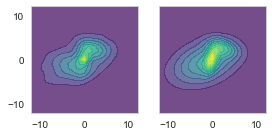

In [61]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [62]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log


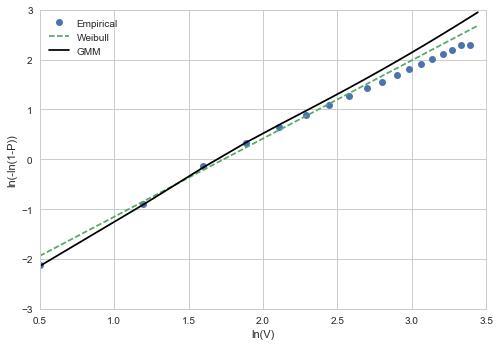

In [63]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Speed Distribution Comparison


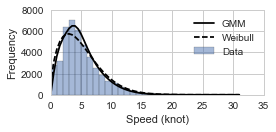

In [64]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

Direction Distribution Comparison


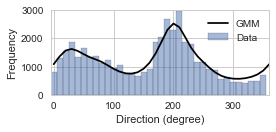

In [65]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print(title)

In [66]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.893222277407
Wall time: 9.86 s


## 6.3 Sectoral Comaprison

In [67]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 3.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 3.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob, 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], x[diff_weibull.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

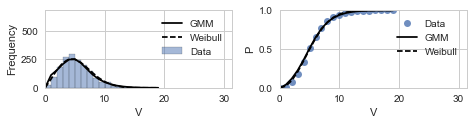

5.0 (-5.0 - 15.0) degree
data size: 1698 weight 0.03923108913636154
GMM Weibull
R square 0.9599833654 0.974255580783
max diff: 0.0492420825167 0.0291708688579 speed value: 1.99794832627 2.99692248941 y gmm 0.118146676156
 


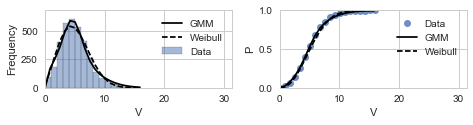

25.0 (15.0 - 35.0) degree
data size: 3421 weight 0.07903978559216303
GMM Weibull
R square 0.983367137776 0.972925891687
max diff: 0.0255977369545 0.0569736696417 speed value: 8.37485590227 5.86239913159 y gmm 0.885247045273
 


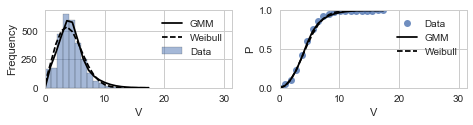

45.0 (35.0 - 55.0) degree
data size: 2979 weight 0.06882768818446468
GMM Weibull
R square 0.969871878755 0.937179756085
max diff: 0.033959134728 0.0666144323385 speed value: 5.4882715116 5.4882715116 y gmm 0.727705853523
 


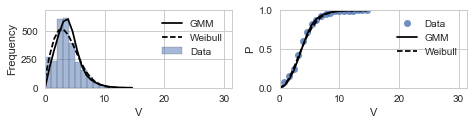

65.0 (55.0 - 75.0) degree
data size: 2702 weight 0.062427799085070006
GMM Weibull
R square 0.905373193706 0.900445720931
max diff: 0.0673056568095 0.0662814513055 speed value: 3.84449167337 3.84449167337 y gmm 0.540022248446
 


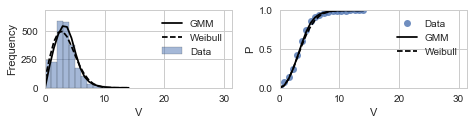

85.0 (75.0 - 95.0) degree
data size: 2384 weight 0.05508063398179382
GMM Weibull
R square 0.924200029894 0.896551202689
max diff: 0.0480216737848 0.0650394001707 speed value: 0.737962078163 5.16573454714 y gmm 0.0295789973562
 


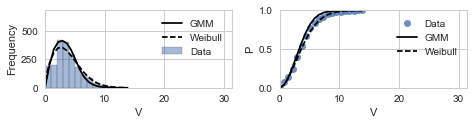

105.0 (95.0 - 115.0) degree
data size: 1973 weight 0.04558476965020101
GMM Weibull
R square 0.902725632789 0.920641189446
max diff: 0.0628264417775 0.0470580432781 speed value: 5.82645822249 5.09815094468 y gmm 0.897088986126
 


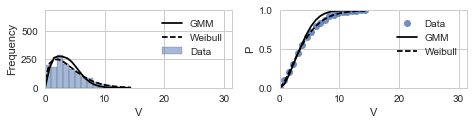

125.0 (115.0 - 135.0) degree
data size: 1494 weight 0.03451781340973153
GMM Weibull
R square 0.803845809142 0.938886488358
max diff: 0.0872474543245 0.0228603105337 speed value: 6.78336856543 0.753707618381 y gmm 0.927274228086
 


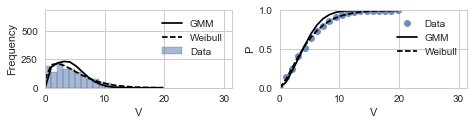

145.0 (135.0 - 155.0) degree
data size: 1466 weight 0.03387089321195878
GMM Weibull
R square 0.776484706305 0.931344710977
max diff: 0.0907605945261 0.0266424913683 speed value: 7.28177524208 1.04025360601 y gmm 0.894307661375
 


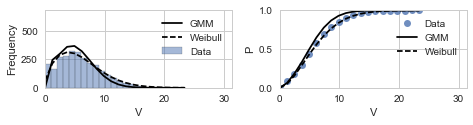

165.0 (155.0 - 175.0) degree
data size: 2778 weight 0.06418372533616747
GMM Weibull
R square 0.889396902383 0.960290474592
max diff: 0.089865933383 0.0344629056845 speed value: 8.61759184423 1.23108454918 y gmm 0.870283499978
 


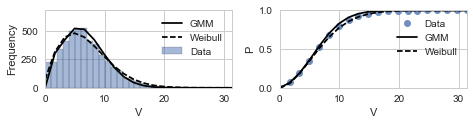

185.0 (175.0 - 195.0) degree
data size: 4757 weight 0.10990712074303406
GMM Weibull
R square 0.978154390623 0.975815340735
max diff: 0.0332410612494 0.0328202494407 speed value: 11.5429475101 8.24496250723 y gmm 0.91068482833
 


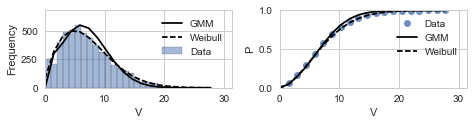

205.0 (195.0 - 215.0) degree
data size: 5250 weight 0.12129753708238991
GMM Weibull
R square 0.93868840917 0.975365251633
max diff: 0.0427321293045 0.0252253571989 speed value: 13.1627370903 8.77515806021 y gmm 0.941208319781
 


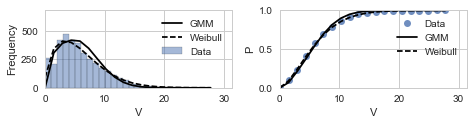

225.0 (215.0 - 235.0) degree
data size: 3665 weight 0.08467723302989695
GMM Weibull
R square 0.911005925131 0.956867762598
max diff: 0.0417779431073 0.0211157076517 speed value: 10.2349509286 5.84854338778 y gmm 0.899076715276
 


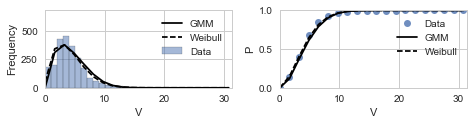

245.0 (235.0 - 255.0) degree
data size: 2337 weight 0.053994732221246705
GMM Weibull
R square 0.938716801881 0.943759502279
max diff: 0.071910371086 0.0368844506723 speed value: 4.86512694638 6.48683592851 y gmm 0.611872256214
 


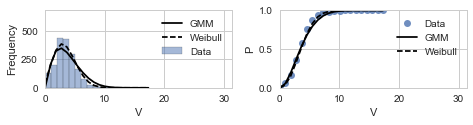

265.0 (255.0 - 275.0) degree
data size: 1792 weight 0.04140289265745575
GMM Weibull
R square 0.906846660554 0.958180120641
max diff: 0.0844613737037 0.0632385214276 speed value: 5.47296316028 4.56080263357 y gmm 0.795002912011
 


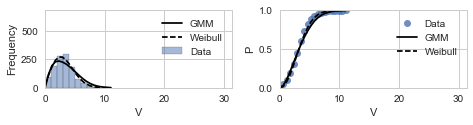

285.0 (275.0 - 295.0) degree
data size: 1190 weight 0.02749410840534171
GMM Weibull
R square 0.891894259 0.965609595436
max diff: 0.0970474380121 0.0597267073103 speed value: 4.65211113179 4.07059724031 y gmm 0.732364326694
 


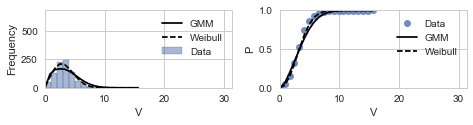

305.0 (295.0 - 315.0) degree
data size: 901 weight 0.020816967792615867
GMM Weibull
R square 0.851422893714 0.95609258761
max diff: 0.111284297651 0.0649523804176 speed value: 4.93070716295 4.10892263579 y gmm 0.757750108565
 


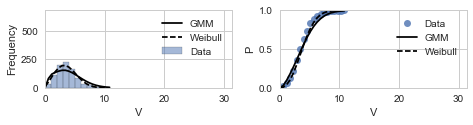

325.0 (315.0 - 335.0) degree
data size: 893 weight 0.020632133450395083
GMM Weibull
R square 0.813998206059 0.966787982662
max diff: 0.110021422024 0.0795943751595 speed value: 5.1264340352 3.98722647182 y gmm 0.727604557819
 


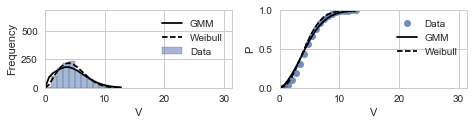

345.0 (335.0 - 355.0) degree
data size: 1185 weight 0.02737858694145372
GMM Weibull
R square 0.87760397842 0.987693682642
max diff: 0.0764986515218 0.0617645175859 speed value: 2.01392270448 3.3565378408 y gmm 0.17438894688
 
Wall time: 1min


In [68]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9205256917393242 0.9526071589315501


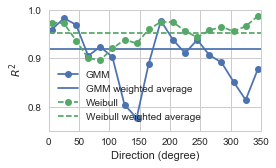

In [69]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.05751424508193333 0.04381571564346222


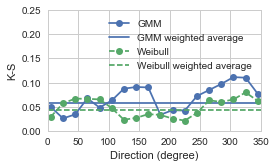

In [70]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

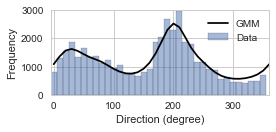

In [71]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [72]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [73]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


305.0 (295.0 - 315.0) Degree Speed Distribution
0.140165421395 5.0 0.766604833877


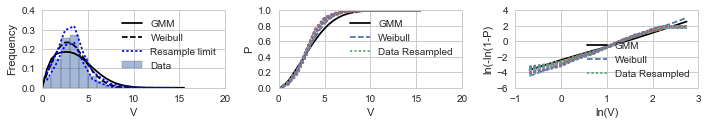

In [74]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [75]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


305.0 (295.0 - 315.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYXGWZ9/89S229Vi/V3el0J+ksnRAgBoIiBNCRZTQa
/TEDJIgQAUH8Oa86mdELcGBiJgaGyAwOCo7DIIgKSHTUKCQYDKvMq0QDBMlCp7N319Zd1bWf9f2j
eQ6nTp9TdWrrrko9n+viIqnKWapOned77vu57+/DqKqqgkKhUCgUSk7YmT4BCoVCoVBqASqYFAqF
QqHYgAomhUKhUCg2oIJJoVAoFIoNqGBSKBQKhWIDKpgUCoVCodiACiaFQqFQKDaggkmhUCgUig2o
YFIoFAqFYgMqmBQKhUKh2IAKJoVCoVAoNqCCSaFQKBSKDahgUigUCoViAyqYFAqFQqHYgAomhUKh
UCg2oIJJoVAolGnj2LFj+NKXvoSrrroK1113HW6++WYcPHgQ999/P0477TT4/X7t34bDYZx++un4
+c9/juPHj2Px4sX4/ve/n7W/W265Bddee+20nDsVTAqFQqFMC6lUCl/4whdw/fXX46c//Sl++MMf
4u/+7u+wceNGAMC8efPwzDPPaP/+6aefxqxZs7S/z5kzBzt27ND+Pj4+jiNHjkzb+fPTdiQKhUKh
VA1f/epX8dRTT5V1n1deeSW2bNli+f6uXbvwwQ9+EGeddZb22rJly/DDH/4Q3/nOd7Bq1Sps374d
n/3sZ7V//1d/9Vfav21ra4PX68XQ0BAWLFiAZ555Bh/96Efx2muvlfVzWEEjTAqFQqFMC8ePH8ec
OXO0v3/hC1/Atddei49+9KMYHR1FZ2cnPB4Pjh07hiNHjqCnpwculytrHx//+Mfxm9/8BgDw3HPP
4ZJLLpm286cRJoVCodQhW7ZsyRkNVoKenh7s3btX+/uDDz4IALjqqqsgyzKA9wRRkiSsXr0ar7zy
StY+LrnkElxzzTX4m7/5G/h8Prjd7mk7fxphUigUCmVauPjii/Hqq69iz5492mtHjhzB6OgoGIYB
APz1X/81nnvuObz22ms499xzp+yjsbERAwMD2LJlCz7xiU9M27kDVDApFAqFMk00NjbiwQcfxKOP
PorPfOYzWLt2LW6//Xbcdttt6O3tBQA0Nzejp6cHS5cuBcuaS9Tq1auxe/dunHfeedN5+mBUVVWn
9YgUCoVCodQgNMKkUCgUCsUGVDApFAqFQrEBrZKl1CWKokCSJAiCAI7jwLIsOI4Dx3Fa8QGFQqHo
oYJJqSsURYHf70dbW5v2d1VVoaoqEokEYrEYent7wbIsGIahQkqhUDSoYFLqAkVRIMsyFEXByMgI
vF4vFEWBKIpwOByaGBIBJT1hpCaOYRhNQKmQUij1CRVMyikNSb3qi8FVVUUwGMTY2BgYhoEsy3A6
nWBZFpIkIZFIwOl0guf5LDG0K6Q8z2t/p1Aopw606IdySiLLMgRBgCAImrhJkqSthCAIAgYGBjAw
MID58+ejq6sLLpcLqqpifHwcR48exdDQEI4ePYrR0VGMj48jkUho4kuEEnhPSCVJQiaT0VK78Xgc
yWQSqVQKmUwGsiyDdnFR6pl169bhjTfeADB5D65YsQIPPfSQ9v61116Lt99+e8p2L774Ip588kkc
P34cV111le3jrVy5Utvv0NBQiWdPI0zKKYYsy1rqlYiaJEkIhUIYHx9HS0sLWJbFrFmzwHGcVvTj
8XigqioymQz6+vq0fWUyGQiCgEwmg3g8rgmwy+WC0+mE0+nU/pwvIs1kMgAAlmW1CJSkdWlESqkH
Vq5ciddeew3Lli3D7t27ccEFF+CFF17A5z73OWQyGZw4cQJLliyZst1FF10EYNKLdiahgkk5JTAT
SlEUEQqFEIlE0NraigULFsDpdCIWi2WlVK3gOA4NDQ1oaGjIep1U1xIxjcfjyGQyYBgmS0DJn43z
nHohFUVRi1jJvKj+z1RIKZVk3rypr119NXDXXcW9f/hw7uOdf/75eOCBB3DDDTfghRdewJVXXolv
fetbiMVieOutt/CBD3wAf/zjH/Hv//7v4DgO/f392LhxI7Zt24ZDhw5h7dq1GBsbwy233IJwOIwP
f/jD+OIXv4hbb70Vq1atwkUXXYQXX3wRTz/9NO6+++7CvgwbUMGk1DRmQikIAkKhEKLRKLxeLxYu
XAiHw5F3XwzD2EqZ8jwPnuezhJSIIBHRdDqNiYkJCIIAhmE0EdWLKRFHfWpXkiTtz0RI9cIpy7Kp
CFMotcDSpUtx6NAhqKqKP/7xj1i/fj3OO+88/P73v8f+/ftxwQUX4I477sBPfvITdHR04L777sP/
/M//gOffk6pkMoktW7agoaEB11xzDS6++OJpO38qmJSag1S8qqo6RSiDwSAmJibQ1taGRYsWZd1o
BLvCWAgMw2hC2tjYqL1ORJAIaSqVQiQS0VLBehEl/yfiqK/cVRQFAPDOO+9g3rx5WmGRsdhIvx2F
ko98EWGp7xthWRZLlizBiy++CJ/PB6fTiYsuugjPP/889u3bh2uuuQZ33HEHvvKVrwAA0uk0zj//
fMydO1fbx5IlS9Dc3AwAOPPMMzE8PJx1jErWCVDBpNQMRCBTqRQOHTqExYsXg2EYZDIZBINBxGIx
tLe3WwolwUowKyWkDodjSoSrqipEUdQKk5LJpCakPM9PmR8lQkr2CWQLqT7FbDVHSqFUAytXrsR/
/ud/4uMf/zgAYMWKFXjggQcATC4Q3dPTgwceeADNzc147rnn0NDQgJGREW37oaEhJBIJuFwuvPHG
G1izZg1effVVBINBAMBf/vKXip07FUxK1UOEUt8eQopoAoEA4vG4LaE0MpORGJnvdDqdWa8TIdXP
jwqCAFEUwfM8FEXB2NgY3G63tr0xqtQLqSAI2vGMQmosUqJQpoPzzz8f//RP/4R77rkHAOB0OtHc
3IzTTjsNLMvi61//Om6++WaoqorGxkbcc889WYLZ2tqKv//7v8fY2BhWrVqFhQsX4sorr8Ttt9+O
bdu2YZ7ZxGuZoKuVUKoWMi9I0q9kcE8kEjh8+DBYlkVHRwc6OjrAcZzt/R48eBD9/f1wu92aoABA
JpPByMhIRW+4YlFVFYIg4OjRo/B6vZqoSpIEh8MxJbWrN2Ow2h8wVUh5nqfzoxSKBTTCpFQdZkLJ
MAxSqRSCwSASiQQAYHBwsCChJFQi9VppSOEQwzBob2/XPjdxKyIRKSk0IkJqnB8lQlpIREpdjSiU
SahgUqoGK6FMJpMIBoNIpVLo7OxEb28v9u/fX5RY6o9lpBaFlGVZuFwuuFyurNcVRclqfSHzo8TV
yNj6YlYwRIRU/52QdC61B6TUI1QwKTNOLqEMBAJIp9Pw+Xzo7+8Hy7Jay0Wx1MPgzrIs3G433G53
1ut6B6RMJoNkMolMJgNFUUxbX8zmOY32gOR4JK0riiLcbnfetDCFUmtQwaTMGFZCmUgkEAgEIAgC
fD4f5syZY1rlqZ/XLITprJKtNoirkcfjyXqdCKmx2EhVVdPWl1xmDIcPH0Zvb6+WQqaG9ZRTBSqY
lGlHVVVEIhEAgMfj0QbPeDyOQCAASZLg8/ng9XpNB1YirOUQzHoQSTtYCWk+VyOjmHIcl3Vd6Mov
lFMJKpiUaUNvUh6NRsHzPDweD2KxGAKBAGRZRldXF1pbW/MOnJXqmaTimU0xrkb61hc7EalVapeu
/EKpNqhgUioOceYhAySJMNLpNA4dOgRFUdDV1YWWlpaCBsZixY0KY2nkczU6cuQIeJ5HOp1GNBq1
5Wqk3wc1rKdUK1QwKRVDv2gzSdOpqopoNIpIJAJVVdHb21uwUAKlFe7U8xxmJSGuRgzDwOv1aiYS
uVyNOI4zLTb

### 6.4.3 Adjacent Sector Variability

In [76]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [77]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


305.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXmYXFWd9nuX2rq6et/T3Ul3JyEstjIsASMZGdkGZPTz
k3wSjAoImAcfDI4LRMAFZYtL0DE46igjqDEMLkEJOBPZhMiAjGFYQkJ30kkn3V1V3VXVtd/1+6Ny
bm7durVX3e6uPu/z8JCuqnPPuVX3nvf+tvfHqKqqgoKCgoKCgiIn2LleAAUFBQUFxUIAJUwKCgoK
CooCQAmTgoKCgoKiAFDCpKCgoKCgKACUMCkoKCgoKAoAJUwKCgoKCooCQAmTgoKCgoKiAFDCpKCg
oKCgKACUMCkoKCgoKAoAJUwKCgoKCooCQAmTgoKCgoKiAFDCpKCgoKCgKACUMCkoKCgoKAoAJUwK
CgoKCooCQAmTgoKCgoKiAFDCpKCgoKCwDEeOHMFNN92EdevW4WMf+xiuv/56HDhwAN/73vdw8skn
Y2pqSvvs9PQ0Tj31VPz617/G+Pg4TjrpJPzwhz9MO96nPvUpbNiwwZK1U8KkoKCgoLAE8XgcGzdu
xNVXX40dO3bgZz/7GT796U/ja1/7GgBg2bJl2LVrl/b5xx9/HN3d3drf/f39ePLJJ7W/A4EAxsbG
LFs/b9lMFBQUFBTzBp///OfxyCOPVPSYV1xxBbZs2ZL1/aeeegrnnHMOTj/9dO214eFh/OxnP8O/
/Mu/4NJLL8UTTzyBT3ziE9rnzz//fO2zzc3NaGpqwsjICIaGhrBr1y5ccsklePnllyt6HtlALUwK
CgoKCkswPj6O/v5+7e+NGzdiw4YNuOSSSzA5OYm2tja4XC4cOXIEY2Nj6OrqgsPhSDvGZZddhj/8
4Q8AgN27d+OCCy6wbP3UwqSgoKBYhNiyZUtOa7Aa6Orqwmuvvab9/cADDwAA1q1bB1mWAZwgREmS
cPnll+P5559PO8YFF1yAq666Ch/60IfQ3t4Op9Np2fqphUlBQUFBYQne9773Yc+ePfjb3/6mvTY2
NobJyUkwDAMAuPjii7F79268/PLLWL16dcYx3G43BgYGsGXLFrz//e+3bO0AJUwKCgoKCovgdrvx
wAMP4N///d/x0Y9+FB/5yEewefNm3Hrrrejp6QEAeDwedHV14ZRTTgHLmlPU5Zdfjr/+9a8499xz
rVw+GFVVVUtnpKCgoKCgWICgFiYFBQUFBUUBoIRJQUFBQUFRAGiWLMWihKIokCQJgiCA4ziwLAuO
48BxnJZ8QEFBQaEHJUyKRQVFUTA1NYXm5mbtb1VVoaoqotEowuEwenp6wLIsGIahREpBQaGBEibF
ooCiKJBlGYqiYGJiAk1NTVAUBaIowmazaWRICJTUhJGcOIZhNAKlREpBsThBCZOipkFcr/pkcFVV
4fP5MDMzA4ZhIMsy7HY7WJaFJEmIRqOw2+3geT6NDAslUp7ntb8pKChqBzTph6ImIcsyBEGAIAga
uUmSpHVCEAQBAwMDGBgYwODgIDo6OuBwOKCqKgKBAA4fPoyRkREcPnwYk5OTCAQCiEajGvkSogRO
EKkkSUgmk5prNxKJIBaLIR6PI5lMQpZl0CouisWMj3/843j11VcBpO7BM844Az/+8Y+19zds2IA3
33wzY9yzzz6LX/3qVxgfH8e6desKnm/NmjXacUdGRspcPbUwKWoMsixrrldCapIkwe/3IxAIoKGh
ASzLoru7GxzHaUk/LpcLqqoimUyit7dXO1YymYQgCEgmk4hEIhoBOxwO2O122O127d/5LNJkMglJ
khAIBNDd3Q2GYTS3LrVIKRYD1qxZg5dffhnDw8P461//ive85z145pln8MlPfhLJZBJHjx7FqlWr
MsatXbsWQEqLdi5BCZOiJmBGlKIowu/3IxgMorGxEUNDQ7Db7QiHw2ku1WzgOA51dXWoq6tLe51k
1xIyjUQiSCaTYBgmjUDJv/VxTpJcRIhUFEXNYiVxUf2/KZFSVBPLlmW+duWVwN13l/b+oUO553v3
u9+Nbdu24ZprrsEzzzyDK664At/85jcRDofx+uuv4+yzz8ZLL72E73znO+A4Dn19ffja176Gxx57
DKOjo/jIRz6CmZkZfOpTn8L09DTe+9734sYbb8Qtt9yCSy+9FGvXrsWzzz6Lxx9/HPfcc09xX0YB
oIRJsaBhRpSCIMDv9yMUCqGpqQnLly+HzWbLeyyGYQpymfI8D57n04iUWJOERBOJBGZnZyEIAhiG
0UiU4zgtAYmQo55MJUnS/k2IVE+clEgpFjJOOeUUjI6OQlVVvPTSS/jsZz+Lc889Fy+88ALeeust
vOc978Htt9+OX/ziF2htbcXWrVvxm9/8Bjx/gqpisRi2bNmCuro6XHXVVXjf+95n2fopYVIsOKiq
CkVR4Pf7kUwm0dnZqRGlz+fD7OwsmpubsWLFirQbjaBQYiwGDMNoROp2u9PWSmKbgiAgHo9DURSM
jo6C47g0i5T8n5ChPnNXURTteGQ+lmUzko304ygo8iGfRVju+0awLItVq1bh2WefRXt7O+x2O9au
XYunn34a+/btw1VXXYXbb78dmzZtAgAkEgm8+93vxtKlS7VjrFq1Ch6PBwDwjne8AwcPHkybo5p5
ApQwKRYMCFESi5JYl8lkEj6fD+FwGC0tLVmJkiAbYVaLSG02m2bhCoKAo0ePYtmyZRBFUUtMisVi
CAaDEAQBPM9nxEf1REqQi0ij0ShcLhecTqdmkVJQzAesWbMG//qv/4rLLrsMAHDGGWdg27ZtAFIN
oru6urBt2zZ4PB7s3r0bdXV1mJiY0MaPjIwgGo3C4XDg1Vdfxf/7f/8Pe/bsgc/nAwC88cYbVVs7
JUyKeQ9ClMYMVUmSEIlEEAqFCiJKI+bCEiOkTOKddrs97X1VVSGKYlp8VBAEiKIInuczrFG73Z5h
VSqKgunpaTQ3N2e1SDmOy0hSoqCwAu9+97tx22234b777gMA2O12eDwenHzyyWBZFl/60pdw/fXX
Q1VVuN1u3HfffWmE2djYiJtvvhkzMzO49NJLsXz5clxxxRXYvHkzHnvsMSwzC7xWCLRbCcW8BYkL
knIMsrknEgnNorTb7RgYGADHcQUf98CBA+jr64PT6YQgCNrryWQSExMTVb3hRFHEkSNHMDg4WNQ4
VVU1a1SfuStJEmw2W4Zrd2pqCi0tLWnuYePxgEwi5XmeijFQUGQBtTAp5h3MiJJhGMTjcfh8PsRi
MbS2tsLtdiMajRZFlkB1XK/VBkkccjgcWvwGgKZWREiUJBqJooipqSm4XK40MiWqRtlcu+QBQk+k
VNWIgiIFSpgU8wbZiDIWi8Hn8yEej6OtrQ29vb1gWRahUKhk4rMqhlltsCyrEakeR44cQX19PViW
hSAIWnyUqBoZS1/MEoYIkeq/E+LOJZ8lrmVKpBSLAZQwKeYciqIgFovBZrNlEKXX60UikUB7ezv6
+vrSkldKJbi53tytImW73Z7hktUrICWTScRiMSSTSSiKYhofNYtzkhpSWZYxMjKCFStWZGTsUouU
ohZBCZNizkAsykQigZGREaxatQoMwyAajcLr9UIQBLS3t6O/v980y7McwpwrC9NKAjGbi6gauVyu
tNcJkRqTjVRVNS19MVqZVLCeYjGAEiaF5TBzvcqyjEgkAq/XC0mS0N7ejqamppwbayUIcyG6YauB
bESaS9WIeASCwaCpqhFQuGA9JVKKhQBKmBSWQS9SDpywgKLRKFRVxbFjx9DR0YHGxsaCNs5Kkx0l
z0zkUjWKx+OYnJzMqmpkZpEaj0H+TWAmxkBVjSjmCyhhUlQdepEB4AQxzc7OwufzaRmaK1asKGpj
rLRLlqIwkPK

# 7. Result Variability & Cross-Validation

In [78]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.7 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.786  -1.670  -0.649  4.977  3.323   0.347
2  0.120   2.383   2.618  2.134  1.430  -0.336
3  0.094  -0.249  -0.044  0.993  1.978   0.449

GMM Plot Result
0.786247211546 [[-1.66976819 -0.64894109]] [ 2.99322874  5.1823078 ] -70.051804352
0.120127860349 [[ 2.38302886  2.61782624]] [ 1.29582107  2.21786567] -109.661491282
0.0936249281048 [[-0.24879901 -0.04376363]] [ 0.86063991  2.03841215] 164.474926615


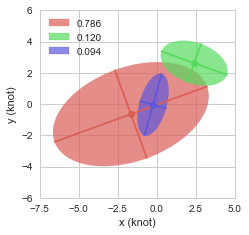

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.024      0.066  1.247580e-07      0.018       0.227

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.025      0.065  1.085447e-07      0.017       0.211

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.785  -1.661  -0.737  4.869  3.313   0.343
2  0.129   2.148   2.773  2.372  1.441  -0.415
3  0.086  -0.219   0.111  0.975  1.717   0.461

GMM Plot Result
0.784892325393 [[-1.66068311 -0.73708003]] [ 2.98430558  5.0772129 ] -69.480069638
0.129303405582 [[ 2.14849796  2.77330542]] [ 1.25652646  2.47496689] -109.312813957
0.0858042690248 [[-0.21925906  0.11098329]] [ 0.82857695  1.79206542] 161.138658414


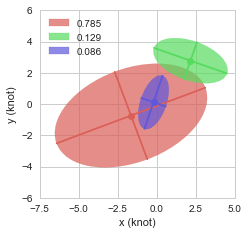

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.025      0.072  1.145949e-07      0.017       0.217

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.026      0.074  1.082536e-07      0.017       0.211

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.769  -1.825  -0.718  4.990  3.279   0.340
2  0.131   2.401   2.716  2.332  1.507  -0.406
3  0.099  -0.235   0.123  1.017  2.021   0.479

GMM Plot Result
0.769364300627 [[-1.82474834 -0.71804939]] [ 2.97148332  5.17906276] -70.9271593766
0.13144232014 [[ 2.40095929  2.71620335]] [ 1.31260372  2.44714732] -111.015321116
0.0991933792326 [[-0.23535025  0.12305272]] [ 0.86252583  2.09125275] 163.577567438


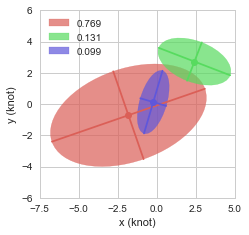

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.023      0.088  1.100678e-07      0.017       0.213

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.024      0.069  1.075413e-07      0.017       0.210

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.773  -1.771  -0.736  4.923  3.322   0.351
2  0.135   2.445   2.663  2.304  1.503  -0.352
3  0.093  -0.258  -0.033  0.989  2.035   0.434

GMM Plot Result
0.772946586291 [[-1.77121528 -0.73602219]] [ 2.98169012  5.1364896 ] -69.4963001677
0.1345019825 [[ 2.44495367  2.66290712]] [ 1.35350432  2.39477274] -109.337047846
0.0925514312092 [[-0.25815483 -0.03313838]] [ 0.86782314  2.08972407] 165.559444566


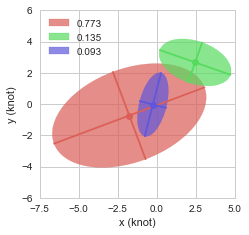

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.025      0.069  1.109721e-07      0.018       0.214

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.024      0.070  1.076757e-07      0.017       0.210

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.791  -1.638  -0.630  4.901  3.328   0.357
2  0.120   2.301   2.733  2.245  1.444  -0.418
3  0.090  -0.248   0.049  0.963  1.907   0.446

GMM Plot Result
0.79069843766 [[-1.63822588 -0.6295714 ]] [ 2.97337388  5.1242035 ] -69.0054655926
0.119662212564 [[ 2.30050424  2.7325655 ]] [ 1.24811209  2.35930453] -111.268948807
0.0896393497759 [[-0.24760757  0.04907404]] [ 0.83553646  1.96642867] 164.428546626


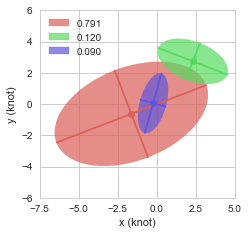

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.023      0.076  1.118288e-07      0.017       0.214

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.023      0.069  1.059726e-07      0.017       0.209

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.785  -1.688  -0.653  4.946  3.306   0.346
2  0.122   2.313   2.704  2.241  1.445  -0.406
3  0.092  -0.249  -0.001  0.974  2.002   0.431

GMM Plot Result
0.785389544443 [[-1.68779744 -0.65276898]] [ 2.97968364  5.14941825] -70.0610415845
0.122447470867 [[ 2.31262448  2.70432222]] [ 1.25921431  2.35006028] -110.92865779
0.0921629846898 [[-0.24857607 -0.00092934]] [ 0.85631037  2.0555366 ] 165.591055906


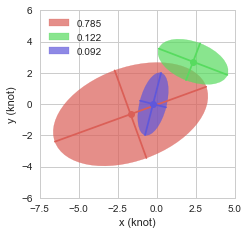

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.023      0.073  1.035286e-07      0.017       0.206

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.024      0.067  1.059112e-07      0.017       0.209

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.781  -1.783  -0.775  4.866  3.238   0.334
2  0.142   2.177   2.785  2.388  1.543  -0.392
3  0.077  -0.217   0.186  0.917  1.781   0.465

GMM Plot Result
0.780954904768 [[-1.78284461 -0.7747481 ]] [ 2.9400539   5.05174596] -70.7242337688
0.141979177631 [[ 2.17732825  2.7849455 ]] [ 1.3563527   2.49802897] -110.505290448
0.0770659176008 [[-0.2172739   0.18553872]] [ 0.78493352  1.84299171] 163.450998711


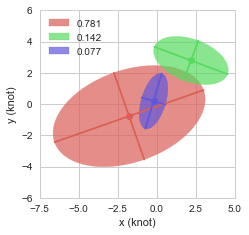

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.025      0.074  1.018980e-07      0.017       0.205

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.026      0.083  1.105739e-07      0.017       0.213

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.788  -1.631  -0.696  4.907  3.297   0.350
2  0.127   2.277   2.709  2.274  1.448  -0.374
3  0.085  -0.252   0.066  0.965  1.812   0.428

GMM Plot Result
0.788060496351 [[-1.63096638 -0.69647653]] [ 2.96304503  5.11596036] -69.7124420181
0.126717655341 [[ 2.2771406   2.70923404]] [ 1.28999966  2.36674961] -109.35489544
0.0852218483077 [[-0.25163095  0.0664093 ]] [ 0.84493724  1.87157084] 163.764983908


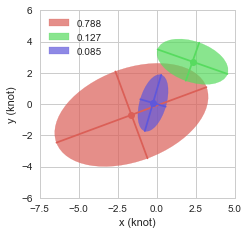

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.025      0.067  1.087273e-07      0.017       0.211

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.026      0.077  1.067221e-07      0.017       0.210

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.785  -1.698  -0.734  4.901  3.309   0.348
2  0.127   2.260   2.778  2.296  1.462  -0.430
3  0.088  -0.239   0.100  0.959  1.876   0.420

GMM Plot Result
0.785310980599 [[-1.69751622 -0.73410429]] [ 2.97509001  5.1103341 ] -69.5922564367
0.126513577687 [[ 2.25973539  2.77789765]] [ 1.25462016  2.41511221] -111.312286489
0.0881754417138 [[-0.23864945  0.10039599]] [ 0.84660247  1.92999593] 164.916294736


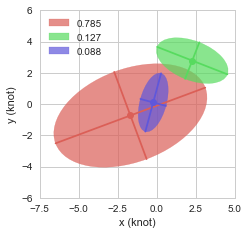

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.026      0.097  1.080006e-07      0.017       0.211

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.025      0.074  1.061973e-07      0.017       0.209

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.777  -1.682  -0.728  4.905  3.334   0.339
2  0.133   2.300   2.773  2.289  1.458  -0.355
3  0.090  -0.269  -0.019  0.968  1.930   0.425

GMM Plot Result
0.776716699341 [[-1.68205044 -0.72805082]] [ 3.0105527   5.11014641] -69.7033419243
0.133003098128 [[ 2.30030946  2.77317687]] [ 1.31393043  2.3745361 ] -108.626609397
0.090280202531 [[-0.26859807 -0.01926651]] [ 0.8524615   1.98347576] 165.15364471


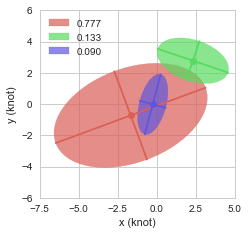

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.025      0.072  1.045918e-07      0.017       0.208

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.024      0.066  1.071663e-07      0.017       0.210


Wall time: 17 s


In [79]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [80]:
# df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn%400 == 0)')

In [81]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32461.5 10820.5
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.126375  0.079759  8.276606e-07    0.047617     0.583779  0.888870
1    0.129845  0.081121  8.257547e-07    0.046472     0.582825  0.889488
2    0.124507  0.079951  8.040214e-07    0.047580     0.574557  0.891551
3    0.128001  0.081434  8.437508e-07    0.047507     0.589197  0.886943

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.136671  0.087100  8.712089e-07    0.047810     0.597562  0.883464
1    0.132845  0.077811  8.319797e-07    0.050176     0.584798  0.887515
2    0.147466  0.077349  8.702249e-07    0.045945     0.599801  0.885045
3    0.162487  0.080006  7.918221e-07    0.047245     0.570349  0.893261

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.121172  0.025117  2.735430e-07    0.026911     0.335276  0.963472
1    0.127454  0.024390  2.698220e-07    0.027117     0.333084  0.964079
2    0.144220  0.025148  2.747578e-07    0.027214     0.336318  0.963029
3    0.109601  0.025028  2.835330e-07    0.028042     0.341516  0.961504

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.140802  0.023096  3.028201e-07    0.029688     0.353357  0.958784
1    0.167834  0.025656  3.167701e-07    0.029050     0.361089  0.956485
2    0.126533  0.030569  2.989071e-07    0.028690     0.350133  0.960232
3    0.152594  0.023724  2.789901e-07    0.026577     0.338653  0.963870

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.072432  0.024721  1.051922e-07    0.016890     0.207984  0.985908
1    0.074944  0.024581  1.112197e-07    0.017242     0.213870  0.985227
2    0.071268  0.022379  1.010231e-07    0.016799     0.203896  0.986331
3    0.062914  0.024634  1.074604e-07    0.016919     0.210193  0.985506

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.082411  0.025570  1.313489e-07    0.018844     0.232481  0.982295
1    0.093736  0.027241  1.121288e-07    0.017798     0.214768  0.984480
2    0.068348  0.021545  1.610412e-07    0.019985     0.257137  0.978960
3    0.098187  0.024045  1.264719e-07    0.019005     0.228194  0.983296

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.043152  0.010988  4.440730e-08    0.010915     0.135170  0.994002
1    0.040329  0.010102  4.262810e-08    0.010752     0.132496  0.994282
2    0.042240  0.011578  4.972532e-08    0.011488     0.143050  0.993305
3    0.040461  0.010426  4.583585e-08    0.011316     0.137147  0.993896

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.041974  0.014064  6.856585e-08    0.013839     0.167837  0.990975
1    0.055303  0.009961  7.375742e-08    0.014121     0.173830  0.990088
2    0.056033  0.017039  5.503409e-08    0.012608     0.150318  0.992688
3    0.061081  0.014661  6.988774e-08    0.013166     0.170115  0.990408

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.076318  0.014286  3.475267e-08    0.009863     0.119650  0.995312
1    0.096197  0.013732  3.441089e-08    0.009469     0.118941  0.995407
2    0.051029  0.018447  2.644827e-08    0.008608     0.104258  0.996436
3    0.105116  0.012924  3.539071e-08    0.009669     0.120620  0.995262

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.104841  0.011216  6.167179e-08    0.012333     0.158885  0.991855
1    0.110578  0.019755  6.323989e-08    0.013918     0.161374  0.991379
2    0.388956  0.021935  4.374698e-08    0.010372     0.134285  0.994203
3    0.087025  0.013662  5.300110e-08    0.012464     0.147742  0.992838

Wall time: 57.2 s


In [82]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.127182  0.080566  8.252969e-07    0.047294     0.582590  0.889213
2    0.125612  0.024921  2.754139e-07    0.027321     0.336548  0.963021
3    0.070389  0.024079  1.062239e-07    0.016963     0.208986  0.985743
4    0.041546  0.010773  4.564914e-08    0.011118     0.136966  0.993871
5    0.082165  0.014847  3.275063e-08    0.009402     0.115867  0.995604

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.144867  0.080566  8.413089e-07    0.047794     0.588128  0.887321
2    0.146941  0.025761  2.993718e-07    0.028501     0.350808  0.959843
3    0.085670  0.024600  1.327477e-07    0.018908     0.233145  0.982258
4    0.053598  0.013931  6.681128e-08    0.013433     0.165525  0.991040
5    0.172850  0.016642  5.541494e-08    0.012272     0.150571  0.992569

R_square

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


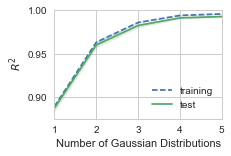

K_S


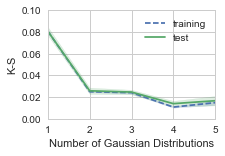

Chi_square


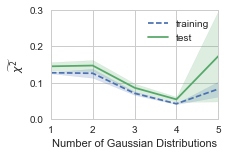

In [83]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

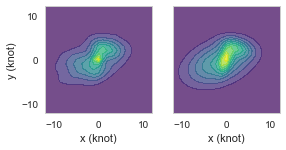

In [84]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

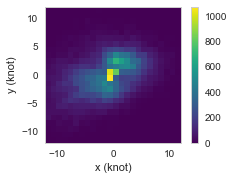

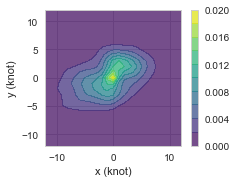

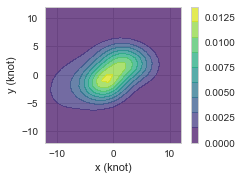

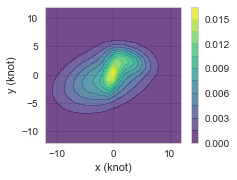

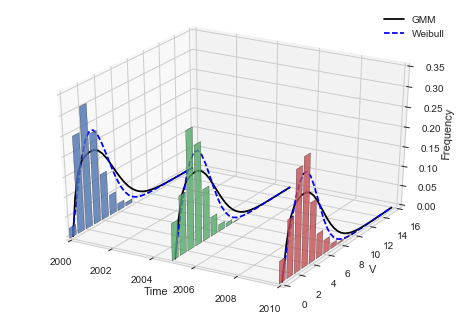

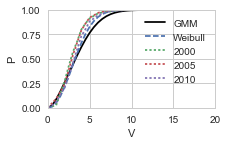

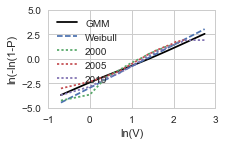

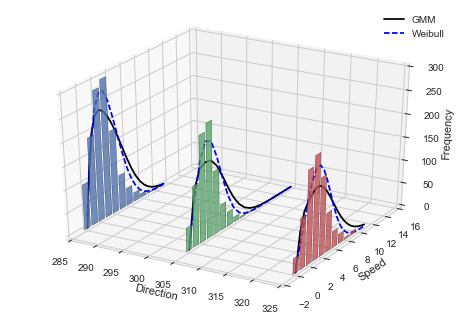

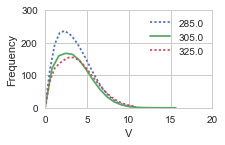

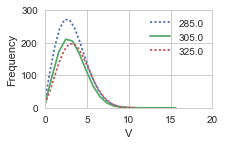

In [85]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [86]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

neuburg
